In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#cd /gdrive/.shortcut-targets-by-id/1sALcXGWjCl-f5f6ICUb05JG-frGWsOWh/1ST PROJECT/

/gdrive/.shortcut-targets-by-id/1sALcXGWjCl-f5f6ICUb05JG-frGWsOWh/1ST PROJECT


In [ ]:
#cd 'free_suf_op'

/gdrive/.shortcut-targets-by-id/1sALcXGWjCl-f5f6ICUb05JG-frGWsOWh/1ST PROJECT/free_suf_op


In [ ]:
cd /gdrive/My\ Drive/HTIC Lab/1ST PROJECT

/gdrive/My Drive/HTIC Lab/1ST PROJECT


In [ ]:
#cd 1sALcXGWjCl-f5f6ICUb05JG-frGWsOWh

/gdrive/.shortcut-targets-by-id/1sALcXGWjCl-f5f6ICUb05JG-frGWsOWh


In [ ]:
#cd /gdrive/.shortcut-targets-by-id/1-1ucymso8T3p7qV8Uvdo3AouYGQsLHJy/1ST PROJECT/

[Errno 1] Operation not permitted: '/gdrive/.shortcut-targets-by-id/1-1ucymso8T3p7qV8Uvdo3AouYGQsLHJy/1ST PROJECT/'
/content


In [ ]:
%cd /gdrive/MyDrive/1ST\ PROJECT

/gdrive/.shortcut-targets-by-id/1sALcXGWjCl-f5f6ICUb05JG-frGWsOWh/1ST PROJECT


Project 3:
MRI Brain tissue segmentation - a. brain in skull (skull stripping / brain extraction)
Segment hemispheres - 
Grouping of tissue (wm, gm, ventricles, csf, …) tool like freesurfer/atropos/robex
Comparison by eval metrics of sitk  (notebooks 34)


In [ ]:
try:
    import nibabel as nib
except:
    !pip install nibabel
    import nibabel as nib
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
import skimage
import nibabel as nib
from pathlib import Path
# import pydicom
import os
import skimage
from itertools import cycle
from scipy import ndimage as ndi
from skimage import data
from skimage.filters import threshold_multiotsu
try:
  from sklearn.cluster import Kmeans
except:
  !pip install sklearn 
  from sklearn.cluster import KMeans
try: 
    from skfuzzy.cluster import cmeans
except:
    !pip install scikit-fuzzy
    from skfuzzy.cluster import cmeans

     |████████████████████████████████| 1.0MB 4.1MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=9ef118c475c30747a474ee25248aa5a00e32ffd7428b4aa7000cfaf87fb83233
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


# 1. Data set references
https://ida.loni.usc.edu/

https://drive.google.com/drive/folders/1D4Oih54PM8fMduoDtg_AI1wBpPRgxW4w?usp=sharing
https://drive.google.com/drive/folders/15Z5vt7b1fXXepfDeU7ZduT8-e1eHXNdQ?usp=sharing


In [ ]:
1-34vJc4sWaMd7t2yEpBVcfyquZ5aqv66
https://drive.google.com/drive/folders/1DFNsROfl_nMOL0bmlOJSTBzCGXvXiuiY?usp=sharing

In [ ]:
%%capture
! wget -O ABIDE_50035_MRI_MP-RAGE_br_raw_20120830160002436_S164432_I328429 "https://drive.google.com/uc?export=download&id=1DFNsROfl_nMOL0bmlOJSTBzCGXvXiuiY"

In [ ]:
%%capture
! wget -O ABIDE_50036_MRI_MP-RAGE_br_raw_20120830160002436_S164432_I328429.nii "https://drive.google.com/uc?export=download&id=1W4FpmEDcBavBEKtPbiSOoHOrQ35CErXL"

In [ ]:
img = nib.load("ABIDE_50035_MRI_MP-RAGE_br_raw_20120830160002436_S164432_I328429.nii")
# Get data from nibabel image object (returns numpy memmap object)
img_data = img.get_data()
print('Shape Of Image:',img.shape)
img_data_arr = np.asarray(img_data)

NameError: ignored

In [ ]:
axial_slice=int(input('Enter the axial slice no in range 0 to {}:'.format(img_data_arr.shape[2])))
coronal_slice=int(input('Enter the coronal slice no in range 0 to {}:'.format(img_data_arr.shape[1])))
saggital_slice=int(input('Enter the saggital slice no in range 0 to {}:'.format(img_data_arr.shape[0])))

Enter the axial slice no in range 0 to 256:150
Enter the coronal slice no in range 0 to 256:150
Enter the saggital slice no in range 0 to 176:80


In [ ]:
def show_slices (img_data_arr,axial_slice,coronal_slice,saggital_slice):
      img_axial = np.asanyarray(Image.fromarray(img_data_arr[:,:,axial_slice]))
      img_coronal = np.asanyarray(Image.fromarray(img_data_arr[:,coronal_slice,:]))
      img_saggital = np.asanyarray(Image.fromarray(img_data_arr[saggital_slice,:,:]))
      # img = np.asanyarray(img)
      img_axial = cv2.normalize(src=img_axial, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
      img_coronal = cv2.normalize(src=img_coronal, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
      img_saggital = cv2.normalize(src=img_saggital, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
      display = [img_axial,img_coronal,img_saggital]
      label = ['img_axial','img_coronal', 'img_saggital']
      fig = plt.figure(figsize=(15,15))

      for i in range(len(display)):
        #p=np.int(len(display)//2)
        fig.add_subplot(1,4, i+1)
        plt.imshow(display[i], cmap = 'gray')
        plt.title(label[i])

      plt.show()
      return img_axial,img_coronal,img_saggital

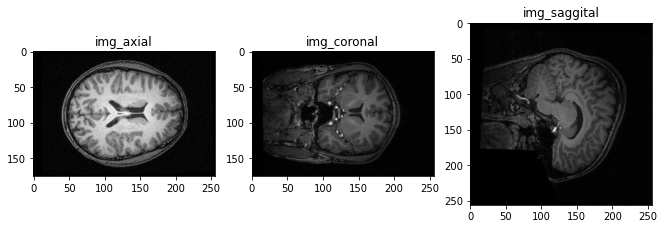

In [ ]:
img_axial,img_coronal,img_saggital=show_slices(img_data_arr,axial_slice,coronal_slice,saggital_slice)

#2. Skull stripping / Brain Extraction

# 2a. Basic skull stripping using conventional image processing algorithm
 



#i) Using Otsu Thresholding and connectedd component analysis

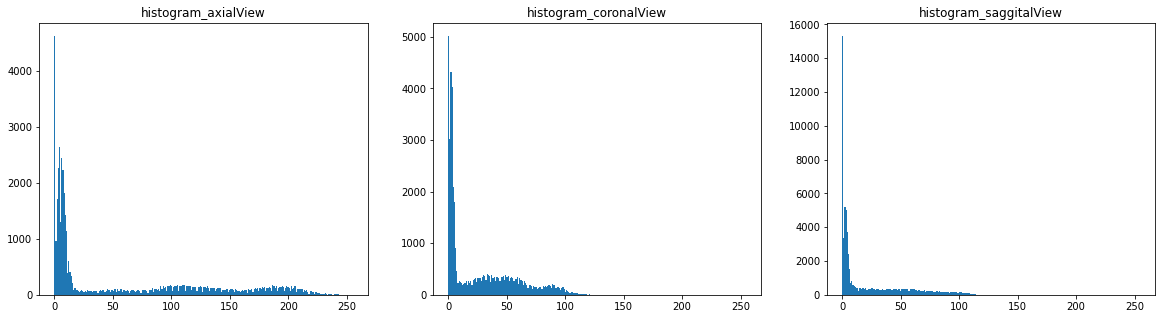

In [ ]:
#Make a histogram of the intensities in the grayscale image
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
ax[0].hist(img_axial.ravel(),256)
ax[0].set_title('histogram_axialView')
ax[1].hist(img_coronal.ravel(),256)
ax[1].set_title('histogram_coronalView')
ax[2].hist(img_saggital.ravel(),256)
ax[2].set_title('histogram_saggitalView')
       
plt.show()

#plt.hist(img_axial.ravel(),256)
#plt.show()

Extracting a Mask

In [ ]:
def contour(image):
    u_int8=image.astype(np.uint8)
    contours, hierarchy = cv2.findContours(u_int8, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    drawing = np.zeros(image.shape,np.uint8)

    # #for cnt in contours:
    cv2.drawContours(drawing,contours,-1,(255,255,255),1)
    return drawing

In [ ]:
def extracting_brain_otsu(img):
  ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
  colormask = np.copy(img)#zeros(((600,494,1)), dtype=np.uint8)
  colormask[thresh==0]=0
  ret, markers = cv2.connectedComponents(thresh)
  #Get the area taken by each component. Ignore label 0 since this is the background.
  marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
  #Get label of largest component by area
  largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
  #Get pixels which correspond to the brain
  brain_mask = markers==largest_component
  brain_out = img.copy()
  #In a copy of the original image, clear those pixels that don't correspond to the brain
  brain_mask[brain_mask==True]=255
  brain_out[brain_mask==False] = 0
  drawing=contour(brain_mask)
  display = [img,thresh,brain_mask,brain_out,drawing]
  label = ['input_img','Thresholded image', 'Brain mask','Brain Stripped','Brain_contour']
  fig = plt.figure(figsize=(15,15))

  for i in range(len(display)):
    #p=np.int(len(display)//2)
    fig.add_subplot(3,5, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

  plt.show()
  return brain_out,brain_mask,drawing

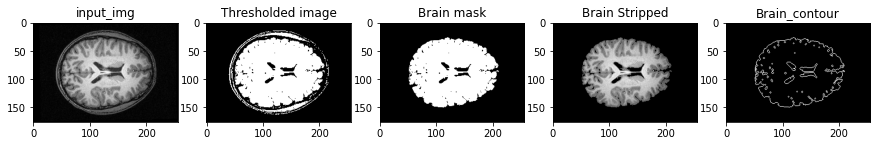

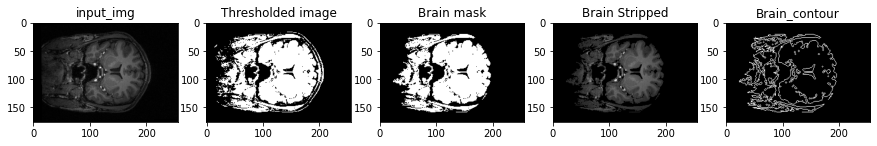

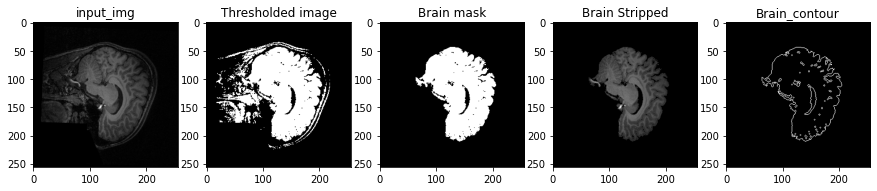

In [ ]:
brain_out_axial_otsu,brain_out_axial_otsu_mask,brain_out_axial_otsu_contour = extracting_brain_otsu(img_axial)
brain_out_coronal_otsu,brain_out_coronal_otsu_mask,brain_out_coronal_otsu_contour = extracting_brain_otsu(img_coronal)
brain_out_saggital_otsu,brain_out_saggital_otsu_mask,brain_out_saggital_otsu_contour = extracting_brain_otsu(img_saggital)

# ii) Using Active Contour

In [ ]:
def circle_level_set(image_shape, center=None, radius=None):
    """Create a circle level set with binary values.
    Parameters
    ----------
    image_shape : tuple of positive integers
        Shape of the image
    center : tuple of positive integers, optional
        Coordinates of the center of the circle given in (row, column). If not
        given, it defaults to the center of the image.
    radius : float, optional
        Radius of the circle. If not given, it is set to the 75% of the
        smallest image dimension.
    Returns
    -------
    """

    if center is None:
        center = tuple(i // 2 for i in image_shape)

    if radius is None:
        radius = min(image_shape) * 3.0 / 8.0

    grid = np.mgrid[[slice(i) for i in image_shape]]
    grid = (grid.T - center).T
    phi = radius - np.sqrt(np.sum((grid)**2, 0))
    res = np.int8(phi > 0)
    return res

def _init_level_set(init_level_set, image_shape):
    """Auxiliary function for initializing level sets with a string.
    If `init_level_set` is not a string, it is returned as is.
    """
    if isinstance(init_level_set, str):
        if init_level_set == 'checkerboard':
            res = checkerboard_level_set(image_shape)
        elif init_level_set == 'circle':
            res = circle_level_set(image_shape)
        else:
            raise ValueError("`init_level_set` not in "
                             "['checkerboard', 'circle']")
    else:
        res = init_level_set
    return res
smoothing=3

class _fcycle(object):

    def __init__(self, iterable):
        """Call functions from the iterable each time it is called."""
        self.funcs = cycle(iterable)

    def __call__(self, *args, **kwargs):
        f = next(self.funcs)
        return f(*args, **kwargs)
def sup_inf(u):
    """SI operator."""

    if np.ndim(u) == 2:
        P = _P2
    elif np.ndim(u) == 3:
        P = _P3
    else:
        raise ValueError("u has an invalid number of dimensions "
                         "(should be 2 or 3)")

    erosions = []
    for P_i in P:
        erosions.append(ndi.binary_erosion(u, P_i))

    return np.array(erosions, dtype=np.int8).max(0)

# SI and IS operators for 2D and 3D.
_P2 = [np.eye(3),
       np.array([[0, 1, 0]] * 3), ####Horizontal gradient
       np.flipud(np.eye(3)),       
       np.rot90([[0, 1, 0]] * 3)]  ####vertical gradient 
def inf_sup(u):
    """IS operator."""

    if np.ndim(u) == 2:
        P = _P2
    # elif np.ndim(u) == 3:
    #     P = _P3
    else:
        raise ValueError("u has an invalid number of dimensions "
                         "(should be 2 or 3)")

    dilations = []
    for P_i in P:
        dilations.append(ndi.binary_dilation(u, P_i))

    return np.array(dilations, dtype=np.int8).min(0)
_curvop = _fcycle([lambda u: sup_inf(inf_sup(u)),   # SIoIS
                   lambda u: inf_sup(sup_inf(u))])  # ISoSI

In [ ]:
def morphological_chan_vese(image, iterations, init_level_set='checkerboard',
                            smoothing=1, lambda1=1, lambda2=1):

                            #iter_callback=lambda x: None

    init_level_set = _init_level_set(init_level_set, image.shape)

    #_check_input(image, init_level_set)

    u = np.int8(init_level_set > 0)

    #iter_callback(u)

    for _ in range(iterations):

        # inside = u > 0
        # outside = u <= 0
        c0 = (image * (1 - u)).sum() / float((1 - u).sum() + 1e-8)  # outside contour
        c1 = (image * u).sum() / float(u.sum() + 1e-8)              #inside contour

        # Image attachment
        du = np.gradient(u)
        abs_du = np.abs(du).sum(0)
        aux = abs_du * (lambda1 * (image - c1)**2 - lambda2 * (image - c0)**2)

        u[aux < 0] = 1
        u[aux > 0] = 0

        # Smoothing
        for _ in range(smoothing):
            u = _curvop(u)
    brain_out_ac = image.copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    brain_out_ac[u==0] = 0
    drawing=contour(u)
    display = [image,u,brain_out_ac,drawing]
    label = ['Original Image','active_contour with circlular level set','Extracted brain for active_contour', 'contour of extracted brain']

    fig = plt.figure(figsize=(22,20))

    for i in range(len(display)):
      fig.add_subplot(5,5, i+1)
      plt.imshow(display[i], cmap = 'gray')
      plt.title(label[i])

    plt.show()
    
        

    return u,brain_out_ac,drawing

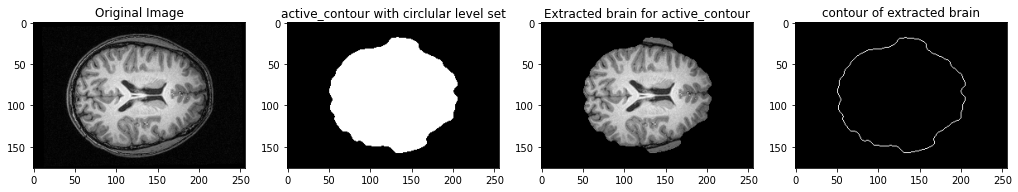

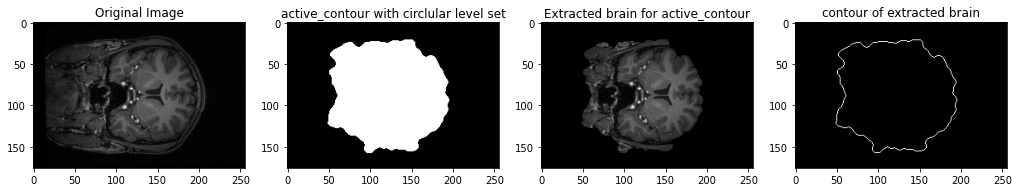

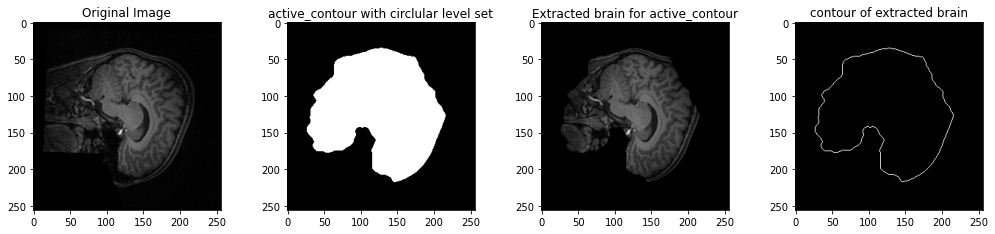

In [ ]:
# Morphological Chan-Vese (or ACWE)
init_ls = 'circle'#circle_level_set(crop_img.shape, center=(600, 250), radius=10)
Morphological_img_circle_axial,brain_out_axial_ac,contour_axial=morphological_chan_vese(img_axial, iterations=500,
                            init_level_set=init_ls,
                            smoothing=3, lambda1=1, lambda2=1)
Morphological_img_circle_coronal,brain_out_coronal_ac,contour_coronal=morphological_chan_vese(img_coronal, iterations=500,
                            init_level_set=init_ls,
                            smoothing=3, lambda1=1, lambda2=1)
Morphological_img_circle_saggital,brain_out_saggital_ac,contour_saggital=morphological_chan_vese(img_saggital, iterations=500,
                            init_level_set=init_ls,
                            smoothing=3, lambda1=1, lambda2=1)

# iii) Advanced skull sripping using deeplearning methods

1. 3D U-Net for Skull Stripping in Brain MRI

2. https://arxiv.org/ftp/arxiv/papers/1901/1901.11341.pdf

# 2b. Segment hemispheres 

In [ ]:
import randomized_hough_transform_edited
import pandas as pd
import time
from google.colab import files

In [ ]:
K=[]
for i in range (1,10):              #Reduce the itteration size while checking to see results in less time but may not give optimal results.
    test= randomized_hough_transform_edited.FindEllipseRHT(iters=1000)
    ti=time.time()
    mask_binary=np.zeros((contour_axial.shape))
    p,q,major,minor,angle,score=test.run(contour_axial,mask_binary)
    if major<60 and minor<40 :   #major and minor bound user defined
       continue
    # elif score >=5:   
    elif score >=30:   
          print(p,q,major,minor,angle,score)
          v=[p,q,major,minor,angle,score]
          K.append(v)

128 90 80 63 0.05244620544033948 35.0
125 86 77 61 -0.10689568838685577 34.0
128 88 79 60 0.0064282065450307615 56.0
127 88 78 61 -0.04910705068891862 55.0
124 87 80 60 -0.10236220178438714 36.0
127 88 79 61 -0.1136648372918129 33.0
127 89 78 61 -0.11792602985339147 48.0


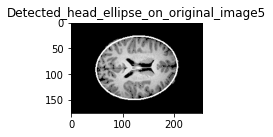

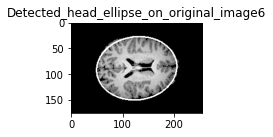

2


In [ ]:
ellipse_with_orignal=[]
max_score=0
for i in range (min(8,len(K))):
    [p,q,major,minor,angle,score]=K[i]
    #color = (255, 255, 255) 
    original_image=np.copy(brain_out_axial_otsu)       
    ellipse_with_orignal =cv2.ellipse(original_image, (p,q), (major,minor), angle*180/np.pi, 0, 360, color= 255, thickness=2)
    #detected_ellipse.append[ellipse_with_orignal]
    # display = [ellipse_with_orignal[i] ]
    # label = ['Detected_head_ellipse_on_original_image{}'.format(i)]
    if (score>max_score) : 
      max_score_index= i
      max_score = score
    
    fig = plt.figure(figsize=(8,8))

    # #for i in range(len(display)):
    fig.add_subplot(3,3, i+1)
    plt.imshow(ellipse_with_orignal, cmap = 'gray')
    plt.title('Detected_head_ellipse_on_original_image{}'.format(i))
plt.show()
print(max_score_index)

p,q,major,minor,angle,score : 127 89 79 61 -0.1300697535739489 62.0


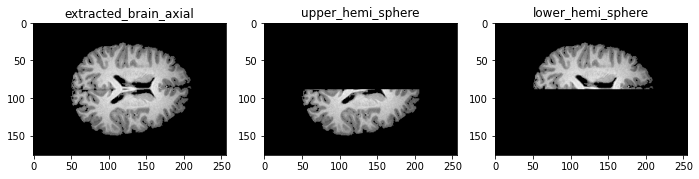

In [ ]:
ellipse_with_orignal=[]
[p,q,major,minor,angle,score]=K[max_score_index]
#color = (255, 255, 255) 
original_image=np.copy(brain_out_axial_otsu)      
ellipse_with_orignal =cv2.ellipse(original_image, (p,q), (major,minor), angle*180/np.pi, 0, 360, color= 255, thickness=1)

fig = plt.figure(figsize=(3,3))
plt.imshow(ellipse_with_orignal, cmap = 'gray')
print('p,q,major,minor,angle,score :',p,q,major,minor,angle,score)
plt.title('Detected_head_ellipse_on_original_image{}'.format(0))
plt.scatter(p,q,marker='o')
x_values=[p-major,p+major]
y_values=[q,q]
plt.plot(x_values,y_values)
upper_hemi_sphere=np.zeros(brain_out_axial_otsu.shape)
for i in range(0,brain_out_axial_otsu.shape[0]):
    if i>=q: upper_hemi_sphere[i,:]=brain_out_axial_otsu[i,:]   
lower_hemi_sphere=np.zeros(brain_out_axial_otsu.shape)
for i in range(0,brain_out_axial_otsu.shape[0]):
    if i<q: lower_hemi_sphere[i,:]=brain_out_axial_otsu[i,:] 
display = [brain_out_axial_otsu,upper_hemi_sphere,lower_hemi_sphere]
label = ['extracted_brain_axial','upper_hemi_sphere','lower_hemi_sphere']

fig = plt.figure(figsize=(20,20))

for i in range(len(display)):
  fig.add_subplot(5,5, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()

#3. Grouping of tissue (wm, gm, ventricles, csf, …) Using Traditional Image Processing Algorithms
Brain image segmentation-
1. https://ieeexplore.ieee.org/document/8661425
2. https://arxiv.org/ftp/arxiv/papers/2010/2010.15526.pdf
3. https://sites.kowsarpub.com/ans/articles/84920.html
4. https://reader.elsevier.com/reader/sd/pii/S1361841510000162?token=93020B27FB54B421DC25ED6667EFE3F25FDA3F165CC64EA13E432673A68C29DEC945C3A4EE1B0A6689DEBC1F4AD6262D
5. https://books.google.co.in/books?hl=en&lr=&id=jhQFEAAAQBAJ&oi=fnd&pg=PA81&dq=mri++%22brain+tissue+segmentation%22&ots=KFrov99irN&sig=KECgb7HJ7ei3VTJ4wz-VCCU9e2c&redir_esc=y#v=onepage&q=mri%20%20%22brain%20tissue%20segmentation%22&f=false

# a. INTENSITY BASED METHODS

i) THRESHOLDING TECHNIQUE(LOCAL,GLOBAL,ADAPTIVE)(Multi Otsu Thresholding)

# 1. MULTI-OTSU Thresholding

In [ ]:
def multi_otsu(image,classes=3):
    plt.rcParams['font.size'] = 9
    if classes ==3:
        thresholds = threshold_multiotsu(image,classes)

        # Using the threshold values, we generate the three regions.
        regions = np.digitize(image, bins=thresholds)

        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

        # Plotting the original image.
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title('Extracted_brain')
        ax[0].axis('off')

        # Plotting the histogram and the two thresholds obtained from
        # multi-Otsu.
        ax[1].hist(image.ravel(), bins=255)
        ax[1].set_title('Histogram')
        for thresh in thresholds:
            ax[1].axvline(thresh, color='r')

        # Plotting the Multi Otsu result.
        ax[2].imshow(regions, cmap='jet')
        ax[2].set_title('Multi-Otsu result')
        ax[2].axis('off')
        # Plotting the Multi Otsu result.
        ax[3].imshow(regions==2, cmap='gray')
        ax[3].set_title('White matter')
        ax[3].axis('off')
        # Plotting the Multi Otsu result.
        ax[4].imshow(regions==1, cmap='gray')
        ax[4].set_title('Gray matter')
        ax[4].axis('off')

        # display = [image,regions==2,regions==1]
        # label = ['extracted_brain','White matter','Gray matter']

        # fig = plt.figure(figsize=(20,20))

        # for i in range(len(display)):
        #   fig.add_subplot(5,5, i+1)
        #   plt.imshow(display[i], cmap = 'gray')
        #   plt.title(label[i])

        # plt.show()
        return regions,regions==2,regions==1
    else:
        thresholds = threshold_multiotsu(image,classes)

        # Using the threshold values, we generate the three regions.
        regions = np.digitize(image, bins=thresholds)

        fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))

        # Plotting the original image.
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title('Original')
        ax[0].axis('off')

        # Plotting the histogram and the two thresholds obtained from
        # multi-Otsu.
        ax[1].hist(image.ravel(), bins=255)
        ax[1].set_title('Histogram')
        for thresh in thresholds:
            ax[1].axvline(thresh, color='r')

        # Plotting the Multi Otsu result.
        ax[2].imshow(regions, cmap='jet')
        ax[2].set_title('Multi-Otsu result')
        ax[2].axis('off')


        ax[3].imshow(regions==1, cmap='gray')
        ax[3].set_title('Multi-Otsu CSF')
        ax[3].axis('off')

        # display = [image,regions==1]
        # label = ['extracted_brain','CSF',]

        # fig = plt.figure(figsize=(20,20))

        # for i in range(len(display)):
        #   fig.add_subplot(5,5, i+1)
        #   plt.imshow(display[i], cmap = 'gray')
        #   plt.title(label[i])

        plt.show()
        return regions,regions==1

In [ ]:
brain_axial_multiotsu_3,brain_axial_multiotsu_WM_3,brain_axial_multiotsu_GM_3 = multi_otsu(brain_out_axial_otsu,3)
brain_coronal_multiotsu_3,brain_coronal_multiotsu_WM_3,brain_coronal_multiotsu_GM_3 = multi_otsu(brain_out_coronal_otsu)
brain_saggital_multiotsu_3,brain_saggital_multiotsu_WM_3,brain_saggital_multiotsu_GM_3 = multi_otsu(brain_out_saggital_otsu)

CSF

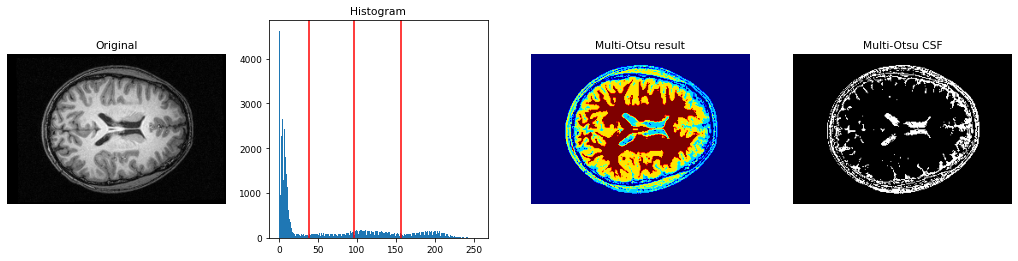

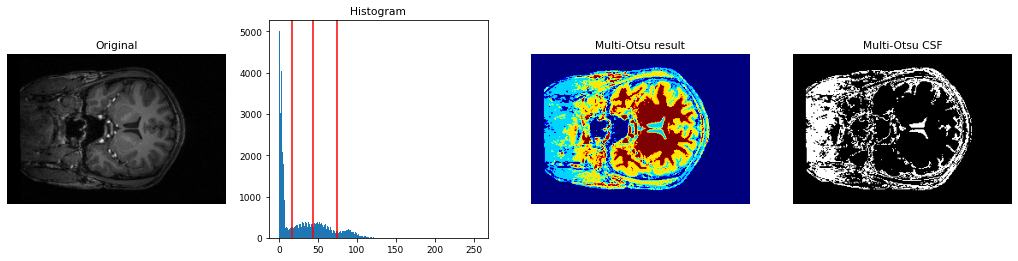

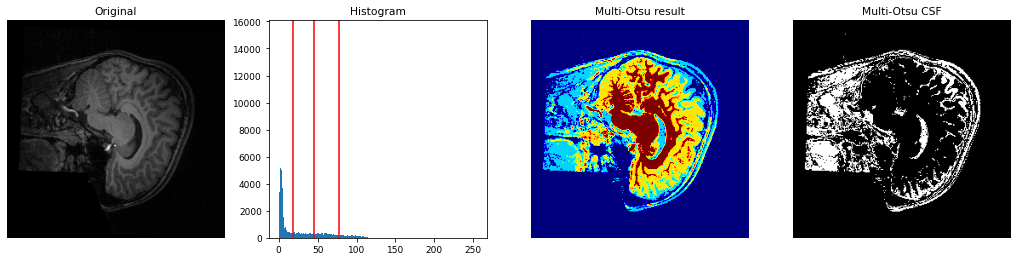

In [ ]:
brain_axial_multiotsu_4,csf_axial_multiotsu_4 = multi_otsu(img_axial,4)
brain_coronal_multiotsu_4,csf_coronal_multiotsu_4 = multi_otsu(img_coronal,4)
brain_saggital_multiotsu_4,csf_saggital_multiotsu_4 = multi_otsu(img_saggital,4)

# b. CLUSTERING BASED SEGMENTATION

# 1. K-means clustering

In [ ]:
def kmeans_clustering_seg(img,clusters):
    rows,cols = img.shape
    img2 = img.reshape(rows * cols,1)
    kmeans = KMeans(n_clusters=clusters, random_state=2).fit(img2)
    [V_centre,cmap]=kmeans.cluster_centers_,kmeans.labels_
    #kmeans.labels_.shape
    mask = np.zeros((clusters,rows*cols))
    
    if clusters ==3:
      label = ['Original','White Matter','Gray matter']
      fig, ax = plt.subplots(nrows=1, ncols=clusters, figsize=(10, 10))

      ax[0].imshow(img, cmap='gray')
      ax[0].set_title(label[0])
      ax[0].axis('off')

      for i in range(1,clusters):
        mask[i,cmap ==i] = 255
        ax[i].imshow(mask[i].reshape((rows,cols)), cmap='gray')
        ax[i].set_title(label[i])
        ax[i].axis('off')
      plt.show()
    else:
      for i in range(1,clusters):
        mask[i,cmap ==i] = 255
      label = ['Original','CSF']
      fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 5))

      ax[0].imshow(img, cmap='gray')
      ax[0].set_title(label[0])
      ax[0].axis('off')

      ax[1].imshow(mask[3].reshape(img.shape), cmap='gray')
      ax[1].set_title(label[1])
      ax[1].axis('off')
      plt.show()
    return mask

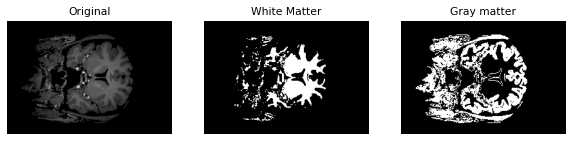

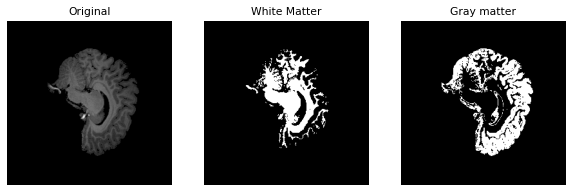

In [ ]:
ret_axial_km = kmeans_clustering_seg(brain_out_axial_otsu,3)
ret_coronal_km = kmeans_clustering_seg(brain_out_coronal_otsu,3)
ret_saggital_km = kmeans_clustering_seg(brain_out_saggital_otsu,3)

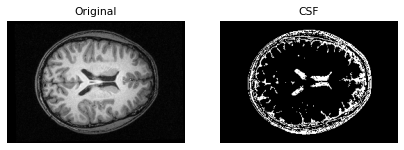

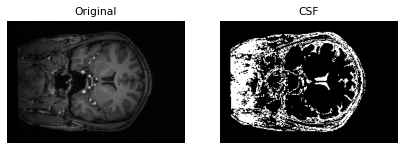

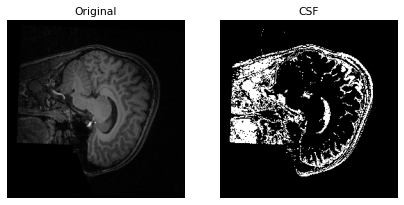

In [ ]:
#For CSF
ret_csf_axial_km = kmeans_clustering_seg(img_axial,4)
ret_csf_coronal_km = kmeans_clustering_seg(img_coronal,4)
ret_csf_saggital_km = kmeans_clustering_seg(img_saggital,4) 

# 2. Fuzzy C-means Clustering

In [ ]:
def fuzzy_cmeans_seg(img, n_clusters):

    #img = cv2.blur(img, (15, 15))
    EPS = 0.005    
    K1 = np.ones((2, 2), np.uint8)
    M = 2.0
    flat = img.reshape((1, -1))
    #np.random.seed(0)
    
     
    if n_clusters==3:
        label = ['Original','Gray Matter','White matter']
        centres, u, a1, a2, a3, a4, a5 = cmeans(flat, n_clusters, M, EPS, 1000,seed=3)
        mask_me = np.zeros((n_clusters,u.shape[1]),dtype=np.uint8)
        defuz = np.argmax(u, axis=0)
        
        fig, ax = plt.subplots(nrows=1, ncols=n_clusters, figsize=(10, 5))
        ax[0].imshow(img, cmap='gray')
        ax[0].set_title(label[0])
        ax[0].axis('off')
        mask_me[0,defuz==0]=1
        ax[1].imshow(mask_me[0].reshape(img.shape), cmap='gray')
        ax[1].set_title(label[2])
        ax[1].axis('off')
        mask_me[2,defuz==2]=1
        ax[2].imshow(mask_me[2].reshape(img.shape), cmap='gray')
        ax[2].set_title(label[1])
        ax[2].axis('off')
        plt.show()
    
    else :
        label = ['Original','seg1','seg2','seg3','seg4']
        centres, u, a1, a2, a3, a4, a5 = cmeans(flat, n_clusters, M, EPS, 1000,seed=4)
        mask_me = np.zeros((n_clusters,u.shape[1]),dtype=np.uint8)
        defuz = np.argmax(u, axis=0)
        
        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
        ax[0].imshow(img, cmap='gray')
        ax[0].set_title(label[0])
        ax[0].axis('off')
        mask_me[0,defuz==0]=1
        ax[1].imshow(mask_me[0].reshape(img.shape), cmap='gray')
        ax[1].set_title(label[1])
        ax[1].axis('off')
        mask_me[1,defuz==1]=1
        ax[2].imshow(mask_me[1].reshape(img.shape), cmap='gray')
        ax[2].set_title(label[2])
        ax[2].axis('off')
        mask_me[2,defuz==2]=1
        ax[3].imshow(mask_me[2].reshape(img.shape), cmap='gray')
        ax[3].set_title(label[3])
        ax[3].axis('off')
        mask_me[3,defuz==3]=1
        ax[4].imshow(mask_me[3].reshape(img.shape), cmap='gray')
        ax[4].set_title(label[4])
        ax[4].axis('off')
        plt.show()
    return mask_me,defuz

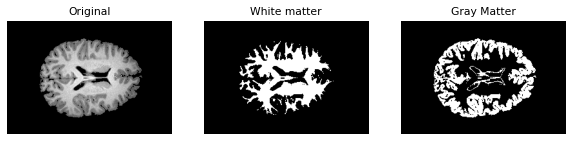

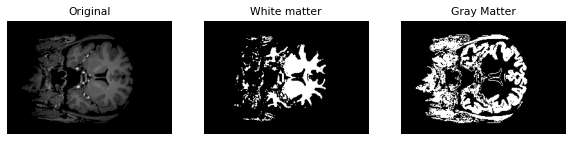

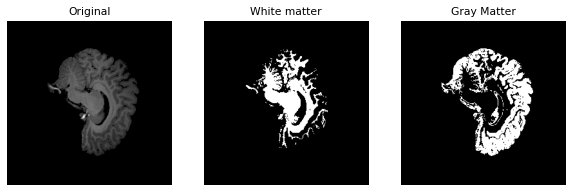

In [ ]:
ret_axial_cmeans,defuz_axial_cmeans = fuzzy_cmeans_seg(brain_out_axial_otsu,3)
ret_coronal_cmeans,defuz_coronal_cmeans = fuzzy_cmeans_seg(brain_out_coronal_otsu,3)
ret_saggital_cmeans,defuz_saggital_cmeans = fuzzy_cmeans_seg(brain_out_saggital_otsu,3)

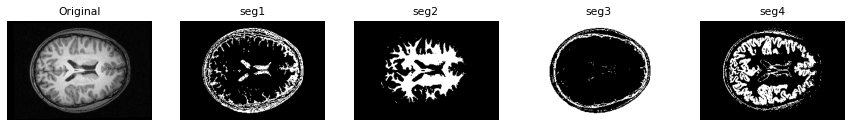

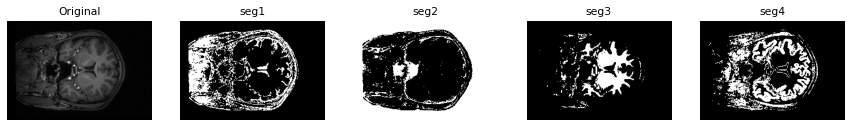

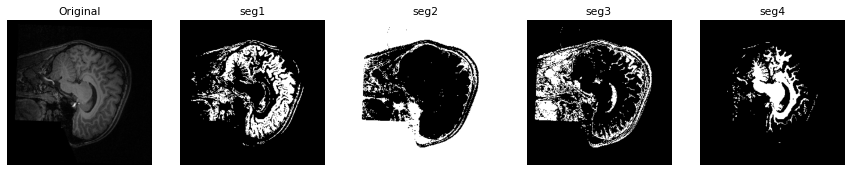

In [ ]:
#For CSF
ret_axial_cmeans_4,defuz_axial_cmeans_4 = fuzzy_cmeans_seg(img_axial,4)
ret_coronal_cmeans_4,defuz_coronal_cmeans_4 = fuzzy_cmeans_seg(img_coronal,4)
ret_saggital_cmeans_4,defuz_saggital_cmeans_4 = fuzzy_cmeans_seg(img_saggital,4)

In [ ]:
brain_axial_kmeans_wm = ret_axial_km[1].reshape(brain_out_axial_otsu.shape)
brain_axial_kmeans_gm = ret_axial_km[2].reshape(brain_out_axial_otsu.shape)
brain_axial_kmeans_csf = ret_csf_axial_km[3].reshape(brain_out_axial_otsu.shape)

brain_coronal_kmeans_wm = ret_coronal_km[1].reshape(brain_out_coronal_otsu.shape)
brain_coronal_kmeans_gm = ret_coronal_km[2].reshape(brain_out_coronal_otsu.shape)
brain_coronal_kmeans_csf = ret_csf_coronal_km[3].reshape(brain_out_coronal_otsu.shape)


brain_saggital_kmeans_wm = ret_saggital_km[1].reshape(brain_out_saggital_otsu.shape)
brain_saggital_kmeans_gm = ret_saggital_km[2].reshape(brain_out_saggital_otsu.shape)
brain_saggital_kmeans_csf = ret_csf_saggital_km[3].reshape(brain_out_saggital_otsu.shape)

brain_axial_km = [brain_axial_kmeans_wm,brain_axial_kmeans_gm,brain_axial_kmeans_csf]
brain_coronal_km = [brain_coronal_kmeans_wm,brain_coronal_kmeans_gm,brain_coronal_kmeans_csf]
brain_saggital_km = [brain_saggital_kmeans_wm,brain_saggital_kmeans_gm,brain_saggital_kmeans_csf]

brain_kmeans = [brain_axial_km,brain_coronal_km,brain_saggital_km]


In [ ]:
brain_axial_cmeans_wm = ret_axial_cmeans[0].reshape(brain_out_axial_otsu.shape)
brain_axial_cmeans_gm = ret_axial_cmeans[2].reshape(brain_out_axial_otsu.shape)
brain_axial_cmeans_csf = ret_axial_cmeans_4[0].reshape(brain_out_axial_otsu.shape)



brain_coronal_cmeans_wm = ret_coronal_cmeans[0].reshape(brain_out_coronal_otsu.shape)
brain_coronal_cmeans_gm = ret_coronal_cmeans[2].reshape(brain_out_coronal_otsu.shape)
brain_coronal_cmeans_csf = ret_coronal_cmeans_4[0].reshape(brain_out_coronal_otsu.shape)


brain_saggital_cmeans_wm = ret_saggital_cmeans[0].reshape(brain_out_saggital_otsu.shape)
brain_saggital_cmeans_gm = ret_saggital_cmeans[2].reshape(brain_out_saggital_otsu.shape)
brain_saggital_cmeans_csf = ret_saggital_cmeans_4[2].reshape(brain_out_saggital_otsu.shape)

brain_axial_fcm = [brain_axial_cmeans_wm,brain_axial_cmeans_gm,brain_axial_cmeans_csf]
brain_coronal_fcm = [brain_coronal_cmeans_wm,brain_coronal_cmeans_gm,brain_coronal_cmeans_csf]
brain_saggital_fcm = [brain_saggital_cmeans_wm,brain_saggital_cmeans_gm,brain_saggital_cmeans_csf]

brain_cmeans = [brain_axial_fcm,brain_coronal_fcm,brain_saggital_fcm]

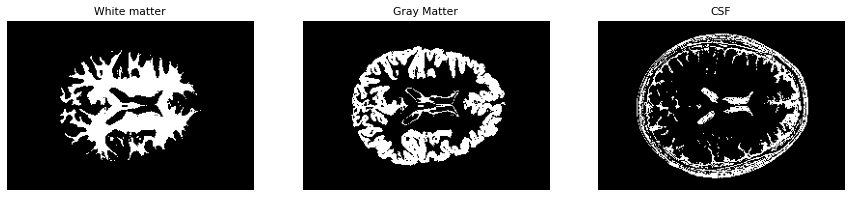

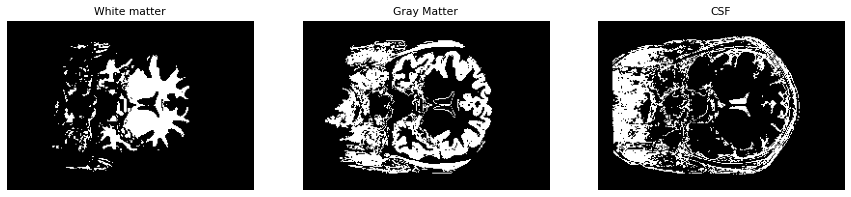

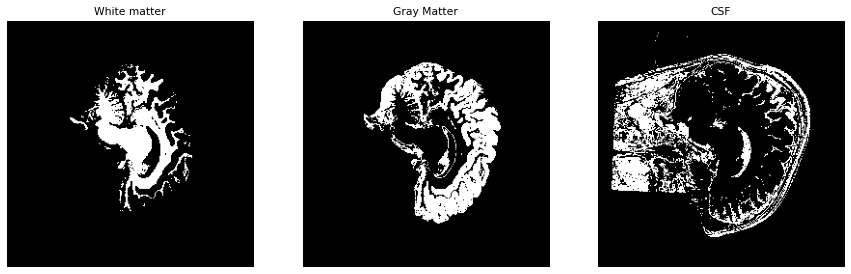

In [ ]:
label = ['White matter','Gray Matter','CSF']
for i in range(3):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
  for j in range(3):
    ax[j].imshow(brain_cmeans[i][j],cmap='gray')
    ax[j].set_title(label[j])
    ax[j].axis('off')
  plt.show()

# 3. Meanshift Clustering

# 4. Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
def gmm(image,n_components):
    img2 = image.reshape((-1,1))
    #covariance choices, full, tied, diag, spherical
    if n_components==3:
            gmm_model_tied = GMM(n_components,random_state=3, covariance_type='tied').fit(img2)  #tied works better than full
            gmm_labels_tied = gmm_model_tied.predict(img2)

            #Put numbers back to original shape so we can reconstruct segmented image
            #original_shape = image.shape

            segmented_tied = gmm_labels_tied.reshape(image.shape[0], image.shape[1])

            white_mater = np.copy(image)
            labels=np.unique(segmented_tied)
            white_mater[segmented_tied!=labels[2]] = 0
            gray_mater = np.copy(image)
            gray_mater[segmented_tied!=labels[1]] = 0
            # csf_gmm = np.copy(image)
            # csf_gmm[segmented_tied!=labels[0]] = 50
            # lvl4=np.copy(image)
            # lvl4[segmented_tied!=labels[1]] = 0
            display = [image,segmented_tied, white_mater, gray_mater]
            label = ['original brain image','gmm_segmented','white_mater', 'gray_mater']

            fig = plt.figure(figsize=(20,20))

            for i in range(len(display)):
              fig.add_subplot(5,5, i+1)
              plt.imshow(display[i], cmap = 'gray')
              plt.title(label[i])

            plt.show()
    else:
            gmm_model_tied = GMM(n_components,random_state=2, covariance_type='full').fit(img2)  #tied works better than full
            gmm_labels_tied = gmm_model_tied.predict(img2)

            #Put numbers back to original shape so we can reconstruct segmented image
            #original_shape = image.shape

            segmented_tied = gmm_labels_tied.reshape(image.shape[0], image.shape[1])

            white_mater = np.copy(image)
            labels=np.unique(segmented_tied)
            white_mater[segmented_tied!=labels[3]] = 0
            gray_mater = np.copy(image)
            gray_mater[segmented_tied!=labels[1]] = 0
            csf_gmm = np.zeros(image.shape)
            csf_gmm[segmented_tied==labels[2]] = 50
            lvl4=np.zeros(image.shape)
            lvl4[segmented_tied==labels[0]] = 100
            display = [image,segmented_tied, white_mater, gray_mater,csf_gmm]
            label = ['original brain image','gmm_segmented','white_mater', 'gray_mater','csf_gmm']

            fig = plt.figure(figsize=(20,20))

            for i in range(len(display)):
              fig.add_subplot(5,5, i+1)
              plt.imshow(display[i], cmap = 'gray')
              plt.title(label[i])

            plt.show()
      
    return segmented_tied

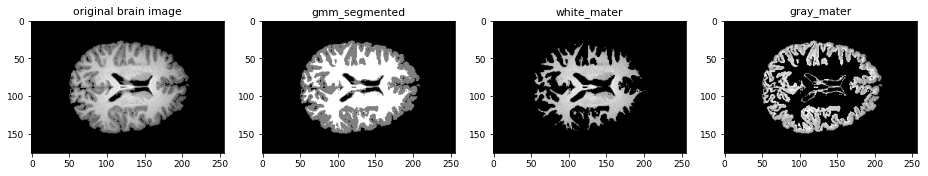

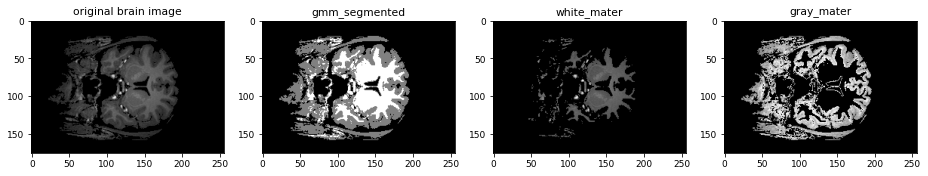

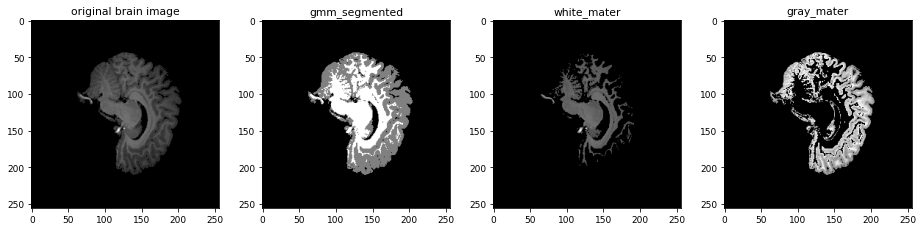

In [ ]:
brain_axial_gmm_3 = gmm(brain_out_axial_otsu,3)
brain_coronal_gmm_3 = gmm(brain_out_coronal_otsu,3)
brain_saggital_gmm_3 = gmm(brain_out_saggital_otsu,3)

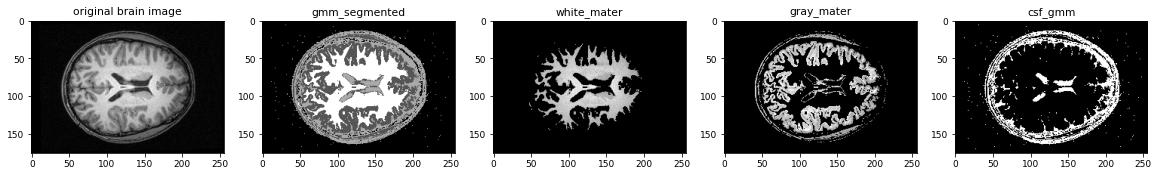

In [ ]:
brain_axial_gmm_4 = gmm(img_axial,4)
brain_coronal_gmm_4 = gmm(img_coronal,4)
brain_saggital_gmm_4 = gmm(img_saggital,4)

In [ ]:
brain_axial_gmm_wm = brain_axial_gmm_3 ==2
brain_axial_gmm_gm = brain_axial_gmm_3 ==1
brain_axial_gmm_csf = brain_axial_gmm_4 ==2


brain_coronal_gmm_wm = brain_coronal_gmm_3 ==2
brain_coronal_gmm_gm = brain_coronal_gmm_3 ==1
brain_coronal_gmm_csf = brain_coronal_gmm_4 ==2

brain_saggital_gmm_wm = brain_saggital_gmm_3 ==2
brain_saggital_gmm_gm = brain_saggital_gmm_3 ==1
brain_saggital_gmm_csf = brain_saggital_gmm_4 ==2



# 5. Watershed Segmentation

In [ ]:
from scipy.ndimage import label

def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=5)
    border = border - cv2.erode(border, None)
    a = cv2.normalize(src=img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(np.uint8)
    _, dt = cv2.threshold(dt, 0.1*dt.max(), 255, cv2.THRESH_BINARY)
    #print(dt)
    lbl, ncc = label(dt)
    lbl = lbl * (255 / (ncc + 1))
    # Completing the markers now. 
    lbl[border == 255] = 255
    image = cv2.cvtColor(a, cv2.COLOR_GRAY2RGB)
    lbl = lbl.astype(np.int32)
    marker32 = np.int32(lbl)
    markers=cv2.watershed(image, marker32)

    markers[markers == -1] = 0
    markers = markers.astype(np.uint8)
    return 255 - markers

def watershed(img):
  
  fig = plt.figure(figsize = (10, 8))
  thresholds = threshold_multiotsu(img,3)  
  regions = np.digitize(img, bins=thresholds)
  display = [img,regions==2,regions==1]
  label = ['extracted_brain','White matter','Gray matter']
  WM=display[1]
  GM=display[2]
  thresholds = threshold_multiotsu(img,4)
  regions = np.digitize(img, bins=thresholds)
  display = [img,regions==1]
  label = ['extracted_brain','CSF',]
  CSF=display[1]

  
  
  thresh=np.uint8(WM)
  _, img_bin = cv2.threshold(thresh, 0, 255,  cv2.THRESH_OTSU)
  img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, np.ones((3, 3), dtype=int))

  result = segment_on_dt(img, img_bin)
  resultCopy=cv2.normalize(src=result, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  contours, hierarchy= cv2.findContours(resultCopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  mask = np.zeros_like(result) # Create mask where white is what we want, black otherwise
  cv2.drawContours(mask, contours, -1, 255, -1) # Draw filled contour in mask
  white_mater = cv2.bitwise_and(mask, img, mask = None) 
  #result[result != 255] = 0
  #result = cv2.dilate(result, None)
  #image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  #image[result == 255] = (0, 0, 255)
  #plt.figure()
  #plt.imshow(image, cmap = 'gray')
  #plt.title('WM')
 
  
  
  thresh=np.uint8(GM)
  _, img_bin = cv2.threshold(thresh, 0, 255,  cv2.THRESH_OTSU)
  img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, np.ones((3, 3), dtype=int))

  result = segment_on_dt(img, img_bin)
 # plt.figure()
 # ret, thresh = cv2.threshold(result, 0, 255, cv2.THRESH_OTSU)
 # plt.imshow(thresh, cmap = 'gray')
 # plt.title('result')

  resultCopy=cv2.normalize(src=result, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  contours, hierarchy= cv2.findContours(resultCopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  mask = np.zeros_like(result) # Create mask where white is what we want, black otherwise
  cv2.drawContours(mask, contours, -1, 255, -1) # Draw filled contour in mask
  gray_mater = cv2.bitwise_and(mask, img, mask = None) 
 
  #result[result != 255] = 0
  #result = cv2.dilate(result, None)
  #image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  #image[result == 255] = (0, 0, 255)
  #plt.figure()
  #plt.imshow(image, cmap = 'gray')
  #plt.title('GM')

  thresh=np.uint8(CSF)
  _, img_bin = cv2.threshold(thresh, 0, 255,  cv2.THRESH_OTSU)
  img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, np.ones((3, 3), dtype=int))

  result = segment_on_dt(img, img_bin)
  resultCopy=cv2.normalize(src=result, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  contours, hierarchy= cv2.findContours(resultCopy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  mask = np.zeros_like(result) # Create mask where white is what we want, black otherwise
  cv2.drawContours(mask, contours, -1, 255, -1) # Draw filled contour in mask
  csf = cv2.bitwise_and(mask, img, mask = None) 
  display = [img, white_mater,gray_mater,csf]
  label = ['original brain image','white_mater', 'gray_mater','csf']
  fig = plt.figure(figsize=(20,20))
  for i in range(len(display)):
    fig.add_subplot(5,5, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
  plt.show()
  return img,white_mater,gray_mater,csf
 # result[result != 255] = 0
 # result = cv2.dilate(result, None)
 # image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
 # image[result == 255] = (0, 0, 255)
 # plt.figure()
 # plt.imshow(image, cmap = 'gray')
 # plt.title('CSF')
  
  

for brain extracted

<Figure size 720x576 with 0 Axes>

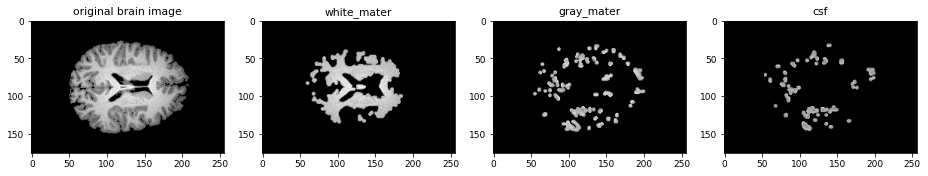

<Figure size 720x576 with 0 Axes>

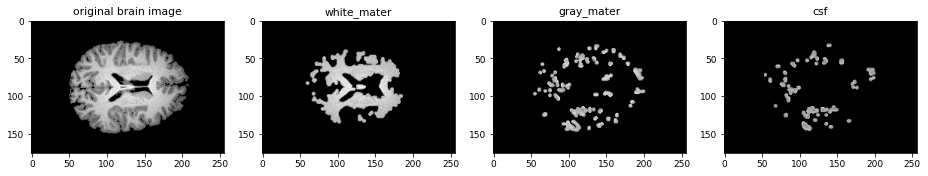

<Figure size 720x576 with 0 Axes>

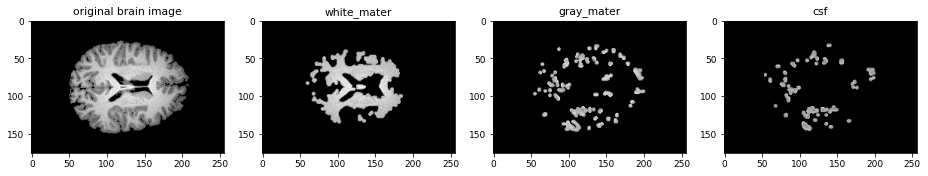

In [ ]:
brain_axial_watershed,brain_axial_watershed_wm,brain_axial_watershed_gm,brain_axial_watershed_csf = watershed(brain_out_axial_otsu)
brain_coronal_watershed,brain_coronal_watershed_wm,brain_coronal_watershed_gm,brain_coronal_watershed_csf = watershed(brain_out_axial_otsu)
brain_saggital_watershed,brain_saggital_watershed_wm,brain_saggital_watershed_gm,brain_saggital_watershed_csf = watershed(brain_out_axial_otsu)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

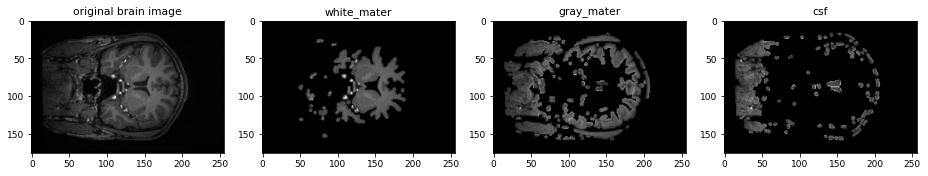

<Figure size 720x576 with 0 Axes>

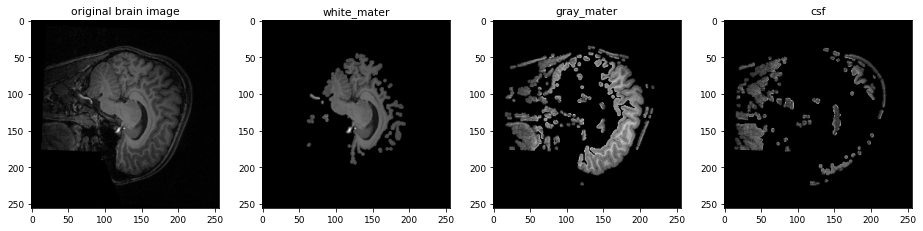

In [ ]:
brain_axial_watershed,brain_axial_watershed_wm,brain_axial_watershed_gm,brain_axial_watershed_csf = watershed(img_axial)
brain_coronal_watershed,brain_coronal_watershed_wm,brain_coronal_watershed_gm,brain_coronal_watershed_csf = watershed(img_coronal)
brain_saggital_watershed,brain_saggital_watershed_wm,brain_saggital_watershed_gm,brain_saggital_watershed_csf = watershed(img_saggital)

# c. Advanced Grouping of Tissues
1. https://www.intechopen.com/books/high-resolution-neuroimaging-basic-physical-principles-and-clinical-applications/advanced-brain-tumour-segmentation-from-mri-images

# Grouping of tissues (wm, gm, ventricles, csf, …) with tools like freesurfer /atropos /robex 

1. surfer - \\
https://stackoverflow.com/questions/32530340/freesurfer-installed-on-ubuntu \\
a. https://surfer.nmr.mgh.harvard.edu/ \\
https://surfer.nmr.mgh.harvard.edu/fswiki/FreeSurfer \\
b. https://www.opensourceimaging.org/project/freesurfer/
2. Robex - https://www.nitrc.org/projects/robex
3. atropos - a. https://github.com/ntustison/KapowskiChronicles \\

# a. Free Surfer

In [ ]:
!pwd

/gdrive/.shortcut-targets-by-id/1sALcXGWjCl-f5f6ICUb05JG-frGWsOWh/1ST PROJECT


In [ ]:
surf_brainout = nib.load("free_surf_50035/brain.nii.gz")
surf_wm = nib.load("free_surf_50035/wm.seg.nii.gz")
surf_rh = nib.load("free_surf_50035/rh.ribbon.nii.gz")
surf_lh = nib.load("free_surf_50035/lh.ribbon.nii.gz")
# Get data from nibabel image object (returns numpy memmap object)
surf_brainout_data,surf_wm_data,surf_rh_data,surf_lh_data = surf_brainout.get_data(),surf_wm.get_data(),surf_rh.get_data(),surf_lh.get_data()
surf_brainout_data,surf_wm,surf_rh,surf_lh=np.asarray(surf_brainout_data),np.asarray(surf_wm_data),np.asarray(surf_rh_data),np.asarray(surf_lh_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


Free Surfer Segmentation Outputs...


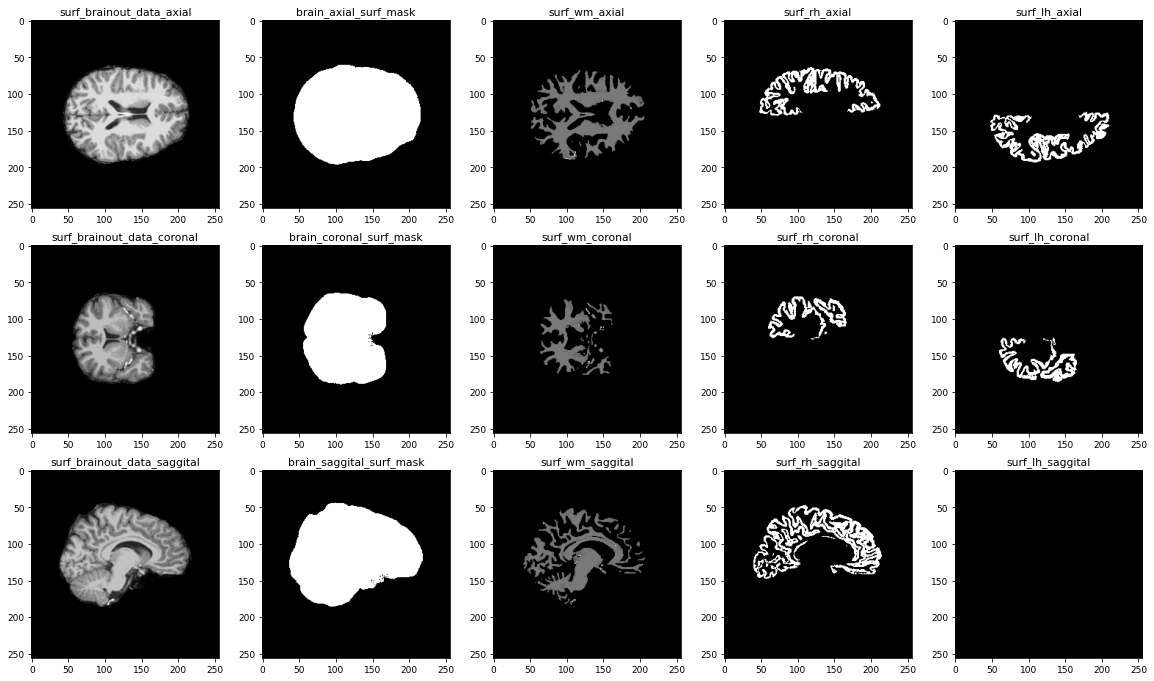

In [ ]:
print("Free Surfer Segmentation Outputs...")
surf_brainout_data_axial,surf_wm_axial,surf_rh_axial,surf_lh_axial = np.asanyarray(Image.fromarray(surf_brainout_data[:,105,:])),np.asanyarray(Image.fromarray(surf_wm[:,105,:])),np.asanyarray(Image.fromarray(surf_rh[:,105,:])),np.asanyarray(Image.fromarray(surf_lh[:,105,:]))
brain_axial_surf_mask=np.copy(surf_brainout_data_axial)
brain_axial_surf_mask[brain_axial_surf_mask!=0]=255

surf_brainout_data_coronal,surf_wm_coronal,surf_rh_coronal,surf_lh_coronal = np.asanyarray(Image.fromarray(surf_brainout_data[:,:,152])),np.asanyarray(Image.fromarray(surf_wm[:,:,152])),np.asanyarray(Image.fromarray(surf_rh[:,:,152])),np.asanyarray(Image.fromarray(surf_lh[:,:,152]))
brain_coronal_surf_mask=np.copy(surf_brainout_data_coronal)
brain_coronal_surf_mask[brain_coronal_surf_mask!=0]=255

surf_brainout_data_saggital,surf_wm_saggital,surf_rh_saggital,surf_lh_saggital = np.asanyarray(Image.fromarray(surf_brainout_data[120,:,:])),np.asanyarray(Image.fromarray(surf_wm[120,:,:])),np.asanyarray(Image.fromarray(surf_rh[120,:,:])),np.asanyarray(Image.fromarray(surf_lh[120,:,:]))
brain_saggital_surf_mask=np.copy(surf_brainout_data_saggital)
brain_saggital_surf_mask[brain_saggital_surf_mask!=0]=255

#img_axial = cv2.normalize(src=img_axial, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
display = [surf_brainout_data_axial,brain_axial_surf_mask,surf_wm_axial,surf_rh_axial,surf_lh_axial,surf_brainout_data_coronal,brain_coronal_surf_mask,surf_wm_coronal,surf_rh_coronal,surf_lh_coronal,surf_brainout_data_saggital,brain_saggital_surf_mask,surf_wm_saggital,surf_rh_saggital,surf_lh_saggital]
label = ['surf_brainout_data_axial','brain_axial_surf_mask','surf_wm_axial','surf_rh_axial','surf_lh_axial','surf_brainout_data_coronal','brain_coronal_surf_mask','surf_wm_coronal','surf_rh_coronal','surf_lh_coronal','surf_brainout_data_saggital','brain_saggital_surf_mask','surf_wm_saggital','surf_rh_saggital','surf_lh_saggital']

fig = plt.figure(figsize=(20,20))

for i in range(len(display)):
  fig.add_subplot(5,5, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()

# b. Robex

In [ ]:
robex_output_mask,robex_stripped_file = nib.load('Robex/50035_robex_outputMaskFile.nii'),nib.load('Robex/50035__robex_strippedFile.nii')
# Get data from nibabel image object (returns numpy memmap object)
robex_output_mask_data,robex_stripped_file_data = robex_output_mask.get_data(),robex_stripped_file.get_data()
robex_output_mask_data,robex_stripped_file_data = np.asarray(robex_output_mask_data),np.asarray(robex_stripped_file_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


Robex skull stripping Outputs...


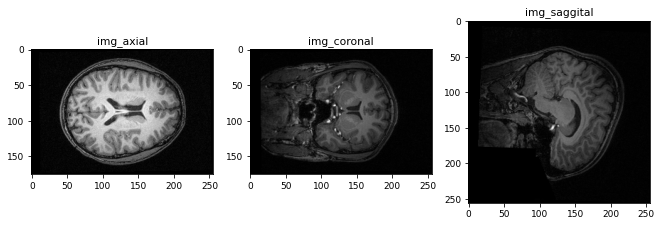

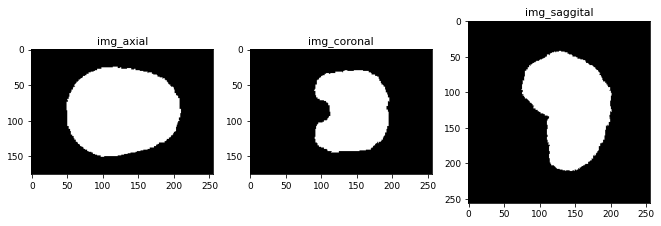

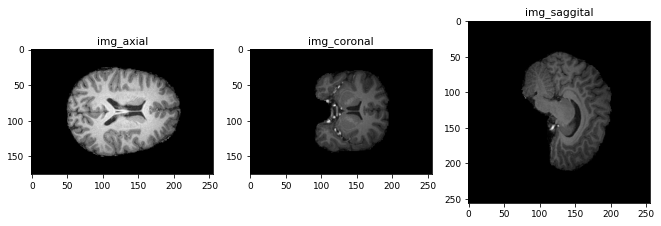

In [ ]:
print("Robex skull stripping Outputs...")
img_axial,img_coronal,img_saggital=show_slices(img_data_arr,axial_slice,coronal_slice,saggital_slice)
img_robex_axial,img_robex_coronal,img_robex_saggital=show_slices(robex_output_mask_data,axial_slice,coronal_slice,saggital_slice)
img_robex_brain_axial,img_robex_brain_coronal,img_robex_brain_saggital=show_slices(robex_stripped_file_data,axial_slice,coronal_slice,saggital_slice)

# c. ANTSPY

Brain skull stripping

In [ ]:
antspy_output_mask,antspy_brain_output = nib.load("Ants_output/brain_mask_antspy_50035.nii.gz"),nib.load("Ants_output/brain_out_antspy_50035.nii.gz")
# Get data from nibabel image object (returns numpy memmap object)
antspy_output_mask_data,antspy_brain_output = antspy_output_mask.get_data(),antspy_brain_output.get_data()
antspy_output_mask_data,antspy_brain_output = np.asarray(antspy_output_mask_data),np.asarray(antspy_brain_output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


ANTSpy brain skull stripping Outputs...


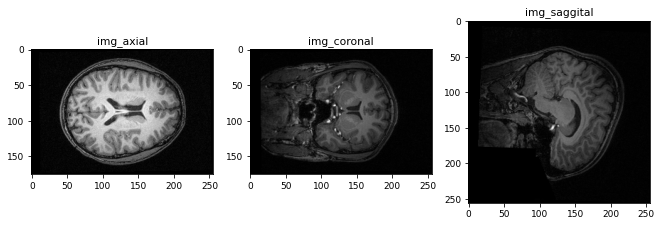

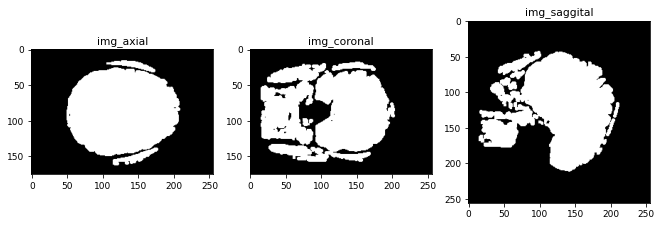

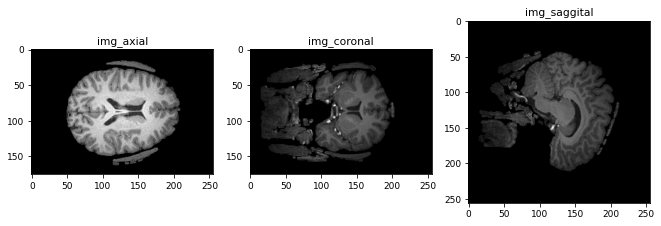

In [ ]:
print("ANTSpy brain skull stripping Outputs...")
img_axial,img_coronal,img_saggital=show_slices(img_data_arr,axial_slice,coronal_slice,saggital_slice)
antspy_output_mask_data_axial,antspy_output_mask_data_coronal,antspy_output_mask_data_saggital=show_slices(antspy_output_mask_data,axial_slice,coronal_slice,saggital_slice)
antspy_brain_output_axial,antspy_brain_output_coronal,antspy_brain_output_saggital=show_slices(antspy_brain_output,axial_slice,coronal_slice,saggital_slice)

Atropos, Kmeans, Otsu stripped brain

In [ ]:
antspy_seg_atropos,antspy_seg_kmeans, antspy_seg_otsu = nib.load("Ants_output/brain_out_seg_atropos_antspy_50035.nii.gz"),nib.load("Ants_output/brain_out_kmeans_seg_antspy_50035.nii.gz"),nib.load("Ants_output/brain_out_seg_otsu_antspy_50035.nii.gz")
# Get data from nibabel image object (returns numpy memmap object)
antspy_seg_atropos_data,antspy_seg_kmeans_data,antspy_seg_otsu_data = antspy_seg_atropos.get_data(),antspy_seg_kmeans.get_data(),antspy_seg_otsu.get_data()
antspy_seg_atropos_data,antspy_seg_kmeans_data,antspy_seg_otsu_data = np.asarray(antspy_seg_atropos_data),np.asarray(antspy_seg_kmeans_data),np.asarray(antspy_seg_otsu_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


ATROPOS Segmentation Outputs...


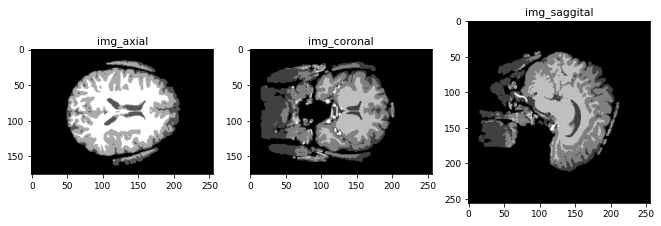

KMEANS Segmentation Outputs...


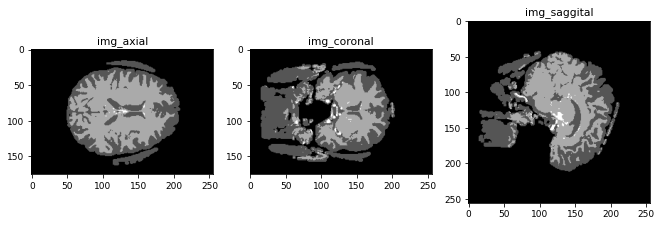

OTSU Segmentation Outputs...


In [ ]:
print("ATROPOS Segmentation Outputs...")
antspy_seg_atropos_data_axial,antspy_seg_atropos_data_coronal,antspy_seg_atropos_data_saggital=show_slices(antspy_seg_atropos_data,axial_slice,coronal_slice,saggital_slice)
print("KMEANS Segmentation Outputs...")
antspy_seg_kmeans_data_axial,antspy_seg_kmeans_data_coronal,antspy_seg_kmeans_data_saggital=show_slices(antspy_seg_kmeans_data,axial_slice,coronal_slice,saggital_slice)
print("OTSU Segmentation Outputs...")
antspy_seg_otsu_data_axial,antspy_seg_otsu_data_coronal,antspy_seg_otsu_data_saggital=show_slices(antspy_seg_otsu_data,axial_slice,coronal_slice,saggital_slice)

In [ ]:
antspy_seg_atropos_whole,antspy_seg_kmeans_whole, antspy_seg_otsu_whole = nib.load("Ants_output/brain_whole_seg_atropos_antspy_50035.nii.gz"),nib.load("Ants_output/brain_whole_kmeans_seg_antspy_50035.nii.gz"),nib.load("Ants_output/brain_whole_seg_otsu_antspy_50035.nii.gz")
# Get data from nibabel image object (returns numpy memmap object)
antspy_seg_atropos_data_whole,antspy_seg_kmeans_data_whole,antspy_seg_otsu_data_whole = antspy_seg_atropos_whole.get_data(),antspy_seg_kmeans_whole.get_data(),antspy_seg_otsu_whole.get_data()
antspy_seg_atropos_data_whole,antspy_seg_kmeans_data_whole,antspy_seg_otsu_data_whole = np.asarray(antspy_seg_atropos_data_whole),np.asarray(antspy_seg_kmeans_data_whole),np.asarray(antspy_seg_otsu_data_whole)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("ATROPOS Segmentation Outputs...")
antspy_seg_atropos_data_axial_whole,antspy_seg_atropos_data_coronal_whole,antspy_seg_atropos_data_saggital_whole=show_slices(antspy_seg_atropos_data_whole,axial_slice,coronal_slice,saggital_slice)
print("KMEANS Segmentation Outputs...")
antspy_seg_kmeans_data_axial_whole,antspy_seg_kmeans_data_coronal_whole,antspy_seg_kmeans_data_saggital_whole=show_slices(antspy_seg_kmeans_data_whole,axial_slice,coronal_slice,saggital_slice)
print("OTSU Segmentation Outputs...")
antspy_seg_otsu_data_axial_whole,antspy_seg_otsu_data_coronal_whole,antspy_seg_otsu_data_saggital_whole=show_slices(antspy_seg_otsu_data_whole,axial_slice,coronal_slice,saggital_slice)

ATROPOS Segmentation Outputs...


KMEANS Segmentation Outputs...


OTSU Segmentation Outputs...


In [ ]:
antspy_labels_3 = np.unique(antspy_seg_atropos_data_axial_whole)
antspy_labels_4 = np.unique(antspy_seg_atropos_data_coronal_whole) #only for atropos coronal and saggital
antspy_labels_3.shape


(4,)

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(antspy_labels_3)-1):
  ax[i].imshow((antspy_seg_otsu_data_axial_whole == antspy_labels_3[i+1]),cmap='gray')
  ax[i].axis("off")

plt.show()

# c.Comparison by eval metrics of sitk (notebooks 34)

https://github.com/InsightSoftwareConsortium/SimpleITK-Notebooks/blob/master/Python/34_Segmentation_Evaluation.ipynb

Hausdorff Distance

In [ ]:
from scipy.spatial.distance import directed_hausdorff
directed_hausdorff(contour_axial,contour(img_robex_axial))

(883.3459118601274, 19, 28)

In [ ]:
def dice(im1, im2):
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

In [ ]:
def accuracy (result, reference):
    # accuracy=(TP+TN)/(TP+FN+FP+TN)
    result = np.atleast_1d(result.astype(np.bool))
    reference = np.atleast_1d(reference.astype(np.bool))
    tp=  np.count_nonzero(result & reference) 
    tn = np.count_nonzero(~result & ~reference)
    fp = np.count_nonzero(result & ~reference)
    fn = np.count_nonzero(~result & reference) 
    try:
        accuracy=(tp+tn)/(tp+tn+fp+fn)
    except ZeroDivisionError:
        accuracy = 0.0
    
    return accuracy

In [ ]:
def jc(result, reference):
    """
    Jaccard coefficient
    Parameters
    ----------
    result: array_like
            Input data containing objects. Can be any type but will be converted
            into binary: background where 0, object everywhere else.
    reference: array_like
            Input data containing objects. Can be any type but will be converted
            into binary: background where 0, object everywhere else.
    jc: float
        The Jaccard coefficient between the object(s) in `result` and the
        object(s) in `reference`. It ranges from 0 (no overlap) to 1 (perfect overlap).

    """
    result = np.atleast_1d(result.astype(np.bool))
    reference = np.atleast_1d(reference.astype(np.bool))
    
    intersection = np.count_nonzero(result & reference)
    union = np.count_nonzero(result | reference)
    
    jc = float(intersection) / float(union) #tp/tp+fn+fp
    
    return jc

In [ ]:
# from nipype.algorithms.metrics import Similarity
# similarity = Similarity()
# similarity.inputs.volume1 = 'rc1s1.nii'
# similarity.inputs.volume2 = 'rc1s2.nii'
# similarity.inputs.mask1 = 'mask.nii'
# similarity.inputs.mask2 = 'mask.nii'
# similarity.inputs.metric = 'cr'
# res = similarity.run() 

# OTSU BRAIN MASK AND ACTIVE CONTOUR(Hausdorff distance, DICE, JC, ACCURACY):

Hausdorff Distance

In [ ]:
import pandas as pd
print("Hausdorff Distance calculation for Brain strippig using otsu")
data = {
  "AXIAL": [np.around(directed_hausdorff(brain_out_axial_otsu_contour,contour(img_robex_axial)),decimals=2), np.around(directed_hausdorff(brain_out_axial_otsu_contour,contour(antspy_output_mask_data_axial)),decimals=2), np.around(directed_hausdorff(brain_out_axial_otsu_contour,contour(surf_brainout_data_axial)),decimals=2)],
  "CORONAL": [np.around(directed_hausdorff(brain_out_coronal_otsu_contour,contour(img_robex_coronal)),decimals=2), np.around(directed_hausdorff(brain_out_coronal_otsu_contour,contour(antspy_output_mask_data_coronal)),decimals=2), np.around(directed_hausdorff(brain_out_coronal_otsu_contour,contour(surf_brainout_data_coronal)),decimals=2)],
  "SAGGITAL": [np.around(directed_hausdorff(brain_out_saggital_otsu_contour,contour(img_robex_saggital)),decimals=2), np.around(directed_hausdorff(brain_out_saggital_otsu_contour,contour(antspy_output_mask_data_saggital)),decimals=2), np.around(directed_hausdorff(brain_out_saggital_otsu_contour,contour(surf_brainout_data_saggital)),decimals=2)]
}

df = pd.DataFrame(data, index = ["ROBEX", "ANTSPY", "FREESURFER"])
pd.set_option('display.max_columns', None)
print(df) 

Hausdorff Distance calculation for Brain strippig using otsu
                             AXIAL                  CORONAL  \
ROBEX       [1464.86, 87.0, 145.0]    [1632.8, 152.0, 33.0]   
ANTSPY        [1508.6, 87.0, 26.0]  [1592.47, 146.0, 111.0]   
FREESURFER  [1486.89, 87.0, 164.0]   [1632.8, 146.0, 107.0]   

                           SAGGITAL  
ROBEX       [1051.39, 110.0, 194.0]  
ANTSPY      [1111.52, 110.0, 247.0]  
FREESURFER  [1111.52, 105.0, 247.0]  


In [ ]:
import pandas as pd
print("Hausdorff Distance calculation for Brain strippig using active contour")
data = {
  "AXIAL": [np.around(directed_hausdorff(contour_axial,contour(img_robex_axial)),decimals=2), np.around(directed_hausdorff(contour_axial,contour(antspy_output_mask_data_axial)),decimals=2), np.around(directed_hausdorff(contour_axial,contour(surf_brainout_data_axial)),decimals=2)],
  "CORONAL": [np.around(directed_hausdorff(contour_coronal,contour(img_robex_coronal)),decimals=2), np.around(directed_hausdorff(contour_coronal,contour(antspy_output_mask_data_coronal)),decimals=2), np.around(directed_hausdorff(contour_coronal,contour(surf_brainout_data_coronal)),decimals=2)],
  "SAGGITAL": [np.around(directed_hausdorff(contour_saggital,contour(img_robex_saggital)),decimals=2), np.around(directed_hausdorff(contour_saggital,contour(antspy_output_mask_data_saggital)),decimals=2), np.around(directed_hausdorff(contour_saggital,contour(surf_brainout_data_saggital)),decimals=2)]
}

df = pd.DataFrame(data, index = ["ROBEX", "ANTSPY", "FREESURFER"])
pd.set_option('display.max_columns', None)
print(df) 

Hausdorff Distance calculation for Brain strippig using active contour
                             AXIAL                 CORONAL  \
ROBEX         [883.35, 19.0, 28.0]  [1111.52, 24.0, 145.0]   
ANTSPY      [919.42, 149.0, 150.0]   [1111.52, 24.0, 72.0]   
FREESURFER  [845.74, 148.0, 247.0]  [1196.06, 24.0, 247.0]   

                          SAGGITAL  
ROBEX       [987.61, 174.0, 247.0]  
ANTSPY       [987.61, 46.0, 247.0]  
FREESURFER    [919.42, 46.0, 62.0]  


DICE COEFFICIENT

In [ ]:
print("Dice coefficient calculation for Brain strippig using otsu...")
data = {
  "AXIAL": [dice(brain_out_axial_otsu_mask,img_robex_axial),dice(brain_out_axial_otsu_mask,antspy_output_mask_data_axial)],
  "CORONAL": [dice(brain_out_coronal_otsu_mask,img_robex_coronal),dice(brain_out_coronal_otsu_mask,antspy_output_mask_data_coronal)],
  "SAGGITAL": [dice(brain_out_saggital_otsu_mask,img_robex_saggital),dice(brain_out_saggital_otsu_mask,antspy_output_mask_data_saggital)]
}

df = pd.DataFrame(data, index = ["ROBEX", "ANTSPY"])
pd.set_option('display.max_columns', None)
print(df) 

Dice coefficient calculation for Brain strippig using otsu...
           AXIAL   CORONAL  SAGGITAL
ROBEX   0.935527  0.720237  0.933995
ANTSPY  0.917895  0.841665  0.803324


In [ ]:
import pandas as pd
print("Dice coefficient calculation for Brain strippig using active contour")
data = {
  "AXIAL": [dice(Morphological_img_circle_axial,img_robex_axial), dice(Morphological_img_circle_axial,antspy_output_mask_data_axial)],
  "CORONAL": [dice(Morphological_img_circle_coronal,img_robex_coronal), dice(Morphological_img_circle_coronal,antspy_output_mask_data_coronal)],
  "SAGGITAL": [dice(Morphological_img_circle_saggital,img_robex_saggital), dice(Morphological_img_circle_saggital,antspy_output_mask_data_saggital)]
}

df = pd.DataFrame(data, index = ["ROBEX", "ANTSPY"])
pd.set_option('display.max_columns', None)
print(df)

Dice coefficient calculation for Brain strippig using active contour
           AXIAL   CORONAL  SAGGITAL
ROBEX   0.942503  0.749372  0.769926
ANTSPY  0.955721  0.785881  0.877863


JACCARD INDEX

In [ ]:
print("Jaccard Index calculation for Brain strippig using otsu...")
data = {
  "AXIAL": [jc(brain_out_axial_otsu_mask,img_robex_axial),jc(brain_out_axial_otsu_mask,antspy_output_mask_data_axial)],
  "CORONAL": [jc(brain_out_coronal_otsu_mask,img_robex_coronal),jc(brain_out_coronal_otsu_mask,antspy_output_mask_data_coronal)],
  "SAGGITAL": [jc(brain_out_saggital_otsu_mask,img_robex_saggital),jc(brain_out_saggital_otsu_mask,antspy_output_mask_data_saggital)]
}

df = pd.DataFrame(data, index = ["ROBEX", "ANTSPY"])
pd.set_option('display.max_columns', None)
print(df) 

Jaccard Index calculation for Brain strippig using otsu...
           AXIAL   CORONAL  SAGGITAL
ROBEX   0.878864  0.562789  0.876163
ANTSPY  0.848249  0.726616  0.671296


In [ ]:
print("Jaccard Index calculation for Brain strippig using active contour")
data = {
  "AXIAL": [jc(Morphological_img_circle_axial,img_robex_axial), jc(Morphological_img_circle_axial,antspy_output_mask_data_axial)],
  "CORONAL": [jc(Morphological_img_circle_coronal,img_robex_coronal), jc(Morphological_img_circle_coronal,antspy_output_mask_data_coronal)],
  "SAGGITAL": [jc(Morphological_img_circle_saggital,img_robex_saggital), jc(Morphological_img_circle_saggital,antspy_output_mask_data_saggital)]
}

df = pd.DataFrame(data, index = ["ROBEX", "ANTSPY"])
pd.set_option('display.max_columns', None)
print(df)

Jaccard Index calculation for Brain strippig using active contour
           AXIAL   CORONAL  SAGGITAL
ROBEX   0.891258  0.599197  0.625919
ANTSPY  0.915197  0.647285  0.782314


For ANTSPY Atropos
Label =1 =>csf ; 
Label =2 =>gm ;
Label =3 =>wm ;

# White Mater Segmentation Evaluation

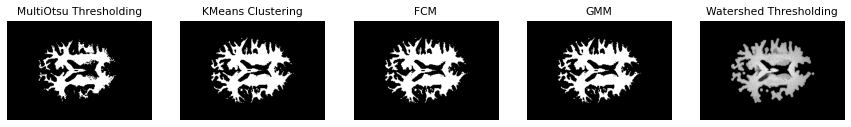

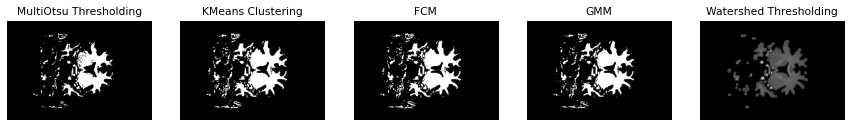

In [ ]:
label_m = ['MultiOtsu Thresholding','KMeans Clustering','FCM','GMM','Watershed Thresholding']
display_axial_wm = [255*(brain_axial_multiotsu_3==2),brain_axial_kmeans_wm,brain_axial_cmeans_wm,brain_axial_gmm_wm,brain_axial_watershed_wm]
display_coronal_wm = [255*(brain_coronal_multiotsu_3==2),brain_coronal_kmeans_wm,brain_coronal_cmeans_wm,brain_coronal_gmm_wm,brain_coronal_watershed_wm]
display_saggital_wm = [255*(brain_saggital_multiotsu_3==2),brain_saggital_kmeans_wm,brain_saggital_cmeans_wm,brain_saggital_gmm_wm,brain_saggital_watershed_wm]
fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))
for i in range(len(display_axial_wm)):
  ax[i].imshow(display_axial_wm[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))
for i in range(len(display_coronal_wm)):
  ax[i].imshow(display_coronal_wm[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))

for i in range(len(display_saggital_wm)):
  ax[i].imshow(display_saggital_wm[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

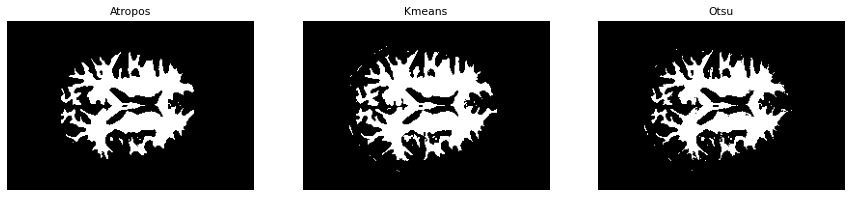

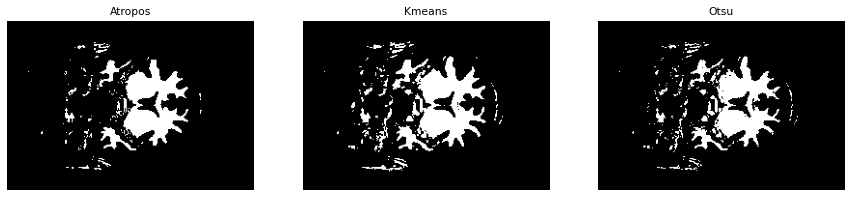

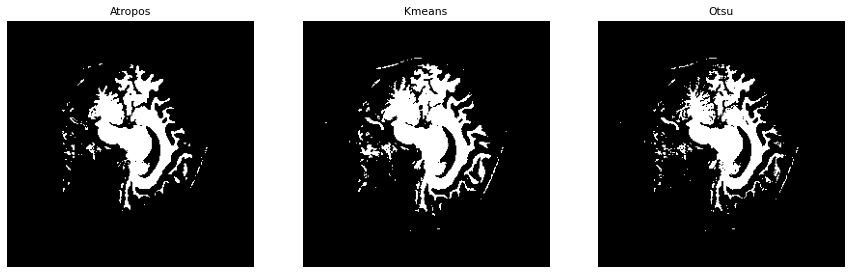

In [ ]:

references_axial_wm = [antspy_seg_atropos_data_axial_whole==antspy_labels_3[3],antspy_seg_kmeans_data_axial_whole==antspy_labels_3[3],antspy_seg_otsu_data_axial_whole==antspy_labels_3[3]]
references_coronal_wm = [antspy_seg_atropos_data_coronal_whole==antspy_labels_4[3],antspy_seg_kmeans_data_coronal_whole==antspy_labels_3[3],antspy_seg_otsu_data_coronal_whole==antspy_labels_3[3]]
references_saggital_wm = [antspy_seg_atropos_data_saggital_whole==antspy_labels_4[3],antspy_seg_kmeans_data_saggital_whole==antspy_labels_3[3],antspy_seg_otsu_data_saggital_whole==antspy_labels_3[3]]

label_ref = ['Atropos','Kmeans','Otsu']
fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_axial_wm)):
  ax[i].imshow(references_axial_wm[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_coronal_wm)):
  ax[i].imshow(references_coronal_wm[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_saggital_wm)):
  ax[i].imshow(references_saggital_wm[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")


DICE COEFFICIENT

In [ ]:
print("Dice coefficeint calculation for white mater segmentation along axial:")
data = {
  "MULTI OTSU": [dice(255*(brain_axial_multiotsu_3==2),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),dice(255*(brain_axial_multiotsu_3==2),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),dice(255*(brain_axial_multiotsu_3==2),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "K-MEANS": [dice((ret_axial_km[1]).reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),dice(ret_axial_km[1].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),dice(ret_axial_km[1].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "C-MEANS": [dice(ret_axial_cmeans[0].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),dice(ret_axial_cmeans[0].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),dice(ret_axial_cmeans[0].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "WATERSHED": [dice(brain_axial_watershed_wm,antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),dice(brain_axial_watershed_wm,antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),dice(brain_axial_watershed_wm,antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "GMM": [dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[2],antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[2],antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[2],antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)
##################################################
print("Dice coefficeint calculation for white mater segmentation along coronal:")
data = {
  "MULTI OTSU": [dice(255*(brain_coronal_multiotsu_3==2),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),dice(255*(brain_coronal_multiotsu_3==2),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),dice(255*(brain_coronal_multiotsu_3==2),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "K-MEANS": [dice((ret_coronal_km[1]).reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),dice(ret_coronal_km[1].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),dice(ret_coronal_km[1].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "C-MEANS": [dice(ret_coronal_cmeans[0].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),dice(ret_coronal_cmeans[0].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),dice(ret_coronal_cmeans[0].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "WATERSHED": [dice(brain_coronal_watershed_wm,antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),dice(brain_coronal_watershed_wm,antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),dice(brain_coronal_watershed_wm,antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "GMM": [dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[2],antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[2],antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[2],antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

##################################################
print("Dice coefficeint calculation for white mater segmentation along saggital:")
data = {
  "MULTI OTSU": [dice(255*(brain_saggital_multiotsu_3==2),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),dice(255*(brain_saggital_multiotsu_3==2),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),dice(255*(brain_saggital_multiotsu_3==2),antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "K-MEANS": [dice((ret_saggital_km[1]).reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),dice(ret_saggital_km[1].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),dice(ret_saggital_km[1].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "C-MEANS": [dice(ret_saggital_cmeans[0].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),dice(ret_saggital_cmeans[0].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),dice(ret_saggital_cmeans[0].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "WATERSHED": [dice(brain_saggital_watershed_wm,antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),dice(brain_saggital_watershed_wm,antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),dice(brain_saggital_watershed_wm,antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "GMM": [dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[2],antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[2],antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[2],antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

Dice coefficeint calculation for white mater segmentation along axial:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.879327  0.976670  0.976670   0.869068  0.976670
ANTSPY KMEANS     0.725158  0.847020  0.847020   0.904638  0.847020
ANTSPY OTSU       0.913254  0.960216  0.960216   0.833919  0.960216
Dice coefficeint calculation for white mater segmentation along coronal:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.891836  0.896736  0.896736   0.741555  0.918255
ANTSPY KMEANS     0.691114  0.828410  0.828410   0.827447  0.800552
ANTSPY OTSU       0.960950  0.877716  0.877716   0.716343  0.905209
Dice coefficeint calculation for white mater segmentation along saggital:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.738936  0.931325  0.922902   0.792100  0.922902
ANTSPY KMEANS     0.538123  0.741113  0.724150   0.830659  0.724150
ANTSPY OTSU       0.795125  0.9450

Jaccard Index

In [ ]:
print("Jaccard Index calculation for white mater segmentation along axial:")
data = {
  "MULTI OTSU": [jc(255*(brain_axial_multiotsu_3==2),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),jc(255*(brain_axial_multiotsu_3==2),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),jc(255*(brain_axial_multiotsu_3==2),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "K-MEANS": [jc((ret_axial_km[1]).reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),jc(ret_axial_km[1].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),jc(ret_axial_km[1].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "C-MEANS": [jc(ret_axial_cmeans[0].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),jc(ret_axial_cmeans[0].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),jc(ret_axial_cmeans[0].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "WATERSHED": [jc(brain_axial_watershed_gm,antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),jc(brain_axial_watershed_wm,antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),jc(brain_axial_watershed_wm,antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))],
  "GMM": [jc(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[2],antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[3])),jc(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[2],antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[2])),jc(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[2],antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[3]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)
##################################################
print("Jaccard Index coefficeint calculation for white mater segmentation along coronal:")
data = {
  "MULTI OTSU": [jc(255*(brain_coronal_multiotsu_3==2),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),jc(255*(brain_coronal_multiotsu_3==2),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),jc(255*(brain_coronal_multiotsu_3==2),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "K-MEANS": [jc((ret_coronal_km[1]).reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),jc(ret_coronal_km[1].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),jc(ret_coronal_km[1].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "C-MEANS": [jc(ret_coronal_cmeans[0].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),jc(ret_coronal_cmeans[0].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),jc(ret_coronal_cmeans[0].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "WATERSHED": [jc(brain_coronal_watershed_wm,antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),jc(brain_coronal_watershed_wm,antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),jc(brain_coronal_watershed_wm,antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))],
  "GMM": [jc(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[2],antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[3])),jc(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[2],antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[2])),jc(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[2],antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[3]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

##################################################
print("Jaccard coefficeint calculation for white mater segmentation along saggital:")
data = {
  "MULTI OTSU": [jc(255*(brain_saggital_multiotsu_3==2),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),jc(255*(brain_saggital_multiotsu_3==2),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),jc(255*(brain_saggital_multiotsu_3==2),antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "K-MEANS": [jc((ret_saggital_km[1]).reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),jc(ret_saggital_km[1].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),jc(ret_saggital_km[1].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "C-MEANS": [jc(ret_saggital_cmeans[0].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),jc(ret_saggital_cmeans[0].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),jc(ret_saggital_cmeans[0].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "WATERSHED": [jc(brain_saggital_watershed_wm,antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),jc(brain_saggital_watershed_wm,antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),jc(brain_saggital_watershed_wm,antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))],
  "GMM": [jc(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[2],antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[3])),jc(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[2],antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[2])),jc(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[2],antspy_seg_atropos_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[3]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

Jaccard Index calculation for white mater segmentation along axial:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.784642  0.954404  0.954404   0.040411  0.954404
ANTSPY KMEANS     0.568822  0.734635  0.734635   0.825880  0.734635
ANTSPY OTSU       0.840356  0.923476  0.923476   0.715146  0.923476
Jaccard Index coefficeint calculation for white mater segmentation along coronal:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.804787  0.812803  0.812803   0.589263  0.848864
ANTSPY KMEANS     0.528017  0.707082  0.707082   0.705679  0.667434
ANTSPY OTSU       0.924835  0.782080  0.782080   0.558049  0.826832
Jaccard coefficeint calculation for white mater segmentation along saggital:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.585962  0.871477  0.856841   0.655766  0.856841
ANTSPY KMEANS     0.368104  0.588705  0.567582   0.710365  0.567582
ANTSPY OTSU       0.65992

# Gray Mater Segmentation Evaluation

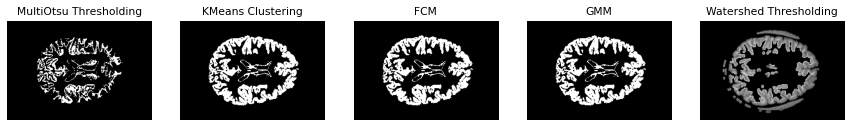

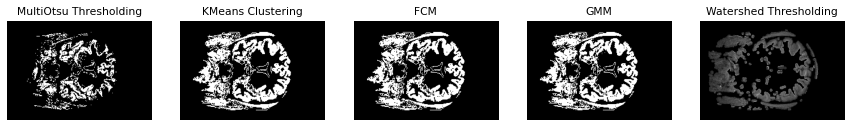

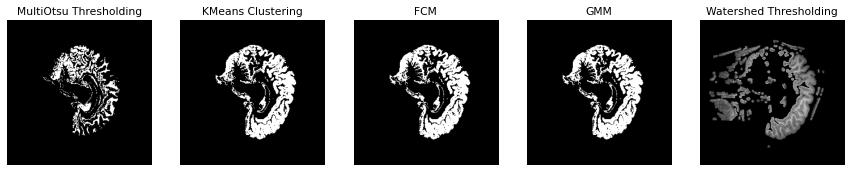

In [ ]:
label_m = ['MultiOtsu Thresholding','KMeans Clustering','FCM','GMM','Watershed Thresholding']
display_axial_gm = [255*(brain_axial_multiotsu_3==1),brain_axial_kmeans_gm,brain_axial_cmeans_gm,brain_axial_gmm_gm,brain_axial_watershed_gm]
display_coronal_gm = [255*(brain_coronal_multiotsu_3==1),brain_coronal_kmeans_gm,brain_coronal_cmeans_gm,brain_coronal_gmm_gm,brain_coronal_watershed_gm]
display_saggital_gm = [255*(brain_saggital_multiotsu_3==1),brain_saggital_kmeans_gm,brain_saggital_cmeans_gm,brain_saggital_gmm_gm,brain_saggital_watershed_gm]
fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))
for i in range(len(display_axial_gm)):
  ax[i].imshow(display_axial_gm[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))
for i in range(len(display_coronal_gm)):
  ax[i].imshow(display_coronal_gm[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))

for i in range(len(display_saggital_gm)):
  ax[i].imshow(display_saggital_gm[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

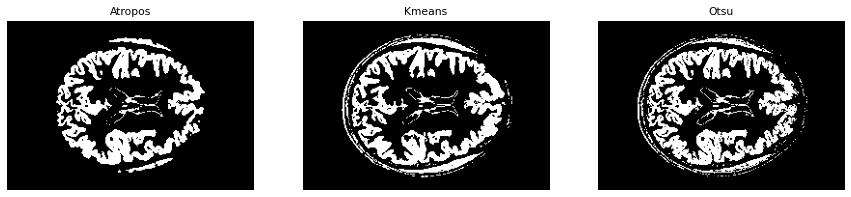

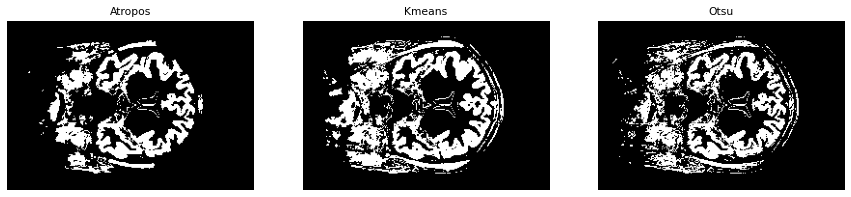

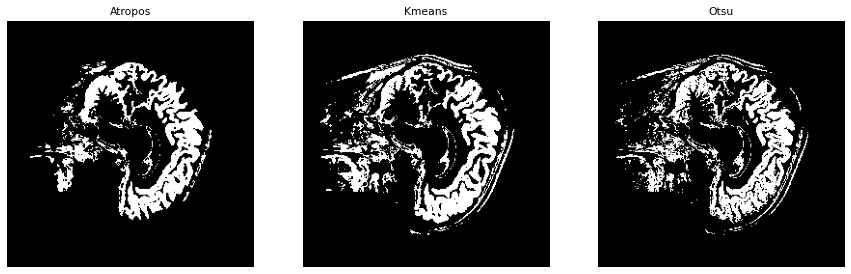

In [ ]:

references_axial_gm = [antspy_seg_atropos_data_axial_whole==antspy_labels_3[2],antspy_seg_kmeans_data_axial_whole==antspy_labels_3[2],antspy_seg_otsu_data_axial_whole==antspy_labels_3[2]]
references_coronal_gm = [antspy_seg_atropos_data_coronal_whole==antspy_labels_4[2],antspy_seg_kmeans_data_coronal_whole==antspy_labels_3[2],antspy_seg_otsu_data_coronal_whole==antspy_labels_3[2]]
references_saggital_gm = [antspy_seg_atropos_data_saggital_whole==antspy_labels_4[2],antspy_seg_kmeans_data_saggital_whole==antspy_labels_3[2],antspy_seg_otsu_data_saggital_whole==antspy_labels_3[2]]

label_ref = ['Atropos','Kmeans','Otsu']
fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_axial_gm)):
  ax[i].imshow(references_axial_gm[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_coronal_gm)):
  ax[i].imshow(references_coronal_gm[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_saggital_gm)):
  ax[i].imshow(references_saggital_gm[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")


In [ ]:
print("Dice coefficeint calculation for gray mater segmentation along axial:")
data = {
  "MULTI OTSU": [dice(255*(brain_axial_multiotsu_3==1),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(255*(brain_axial_multiotsu_3==1),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(255*(brain_axial_multiotsu_3==1),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "K-MEANS": [dice((ret_axial_km[2]).reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(ret_axial_km[2].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(ret_axial_km[2].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "C-MEANS": [dice(ret_axial_cmeans[2].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(ret_axial_cmeans[2].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(ret_axial_cmeans[2].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "WATERSHED": [dice(brain_axial_watershed_gm,antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(brain_axial_watershed_gm,antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(brain_axial_watershed_gm,antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "GMM": [dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[1],antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[1],antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[1],antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)
##################################################
print("Dice coefficeint calculation for gray mater segmentation along coronal:")
data = {
  "MULTI OTSU": [dice(255*(brain_coronal_multiotsu_3==1),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(255*(brain_coronal_multiotsu_3==1),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(255*(brain_coronal_multiotsu_3==1),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "K-MEANS": [dice((ret_coronal_km[2]).reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(ret_coronal_km[2].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(ret_coronal_km[2].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "C-MEANS": [dice(ret_coronal_cmeans[2].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(ret_coronal_cmeans[2].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(ret_coronal_cmeans[2].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "WATERSHED": [dice(brain_coronal_watershed_gm,antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(brain_coronal_watershed_gm,antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(brain_coronal_watershed_gm,antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "GMM": [dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[1],antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[1],antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[1],antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

##################################################
print("Dice coefficeint calculation for gray mater segmentation along saggital:")
data = {
  "MULTI OTSU": [dice(255*(brain_saggital_multiotsu_3==1),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(255*(brain_saggital_multiotsu_3==1),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(255*(brain_saggital_multiotsu_3==1),antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "K-MEANS": [dice((ret_saggital_km[2]).reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(ret_saggital_km[2].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(ret_saggital_km[2].reshape(img_saggital.shape),antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "C-MEANS": [dice(ret_saggital_cmeans[2].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(ret_saggital_cmeans[2].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(ret_saggital_cmeans[2].reshape(img_saggital.shape),antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "WATERSHED": [dice(brain_saggital_watershed_gm,antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(brain_saggital_watershed_gm,antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(brain_saggital_watershed_gm,antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "GMM": [dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[1],antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[1],antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[1],antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

Dice coefficeint calculation for gray mater segmentation along axial:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.455202  0.883952  0.883952   0.742029  0.883952
ANTSPY KMEANS     0.030478  0.654029  0.654029   0.745466  0.654029
ANTSPY OTSU       0.569311  0.819539  0.819539   0.665789  0.819539
Dice coefficeint calculation for gray mater segmentation along coronal:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.689951  0.769642  0.769642   0.509228  0.785937
ANTSPY KMEANS     0.224595  0.687064  0.687064   0.830140  0.678405
ANTSPY OTSU       0.796295  0.676939  0.676939   0.437547  0.698784
Dice coefficeint calculation for gray mater segmentation along saggital:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.367562  0.806704  0.803715   0.592913  0.803715
ANTSPY KMEANS     0.013240  0.523536  0.517967   0.719446  0.517967
ANTSPY OTSU       0.471154  0.769179 

In [ ]:
print("Jaccard Index calculation for gray mater segmentation along axial:")
data = {
  "MULTI OTSU": [jc(255*(brain_axial_multiotsu_3==1),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(255*(brain_axial_multiotsu_3==2),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(255*(brain_axial_multiotsu_3==1),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "K-MEANS": [jc((ret_axial_km[2]).reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(ret_axial_km[2].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(ret_axial_km[2].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "C-MEANS": [jc(ret_axial_cmeans[2].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(ret_axial_cmeans[2].reshape(img_axial.shape),antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(ret_axial_cmeans[2].reshape(img_axial.shape),antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "WATERSHED": [jc(brain_axial_watershed_gm,antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(brain_axial_watershed_gm,antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(brain_axial_watershed_gm,antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))],
  "GMM": [jc(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[1],antspy_seg_atropos_data_axial*(antspy_seg_atropos_data_axial==np.unique(antspy_seg_atropos_data_axial)[2])),dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[1],antspy_seg_kmeans_data_axial*(antspy_seg_kmeans_data_axial==np.unique(antspy_seg_kmeans_data_axial)[1])),dice(brain_axial_gmm_3==np.unique(brain_axial_gmm_3)[1],antspy_seg_atropos_data_axial*(antspy_seg_otsu_data_axial==np.unique(antspy_seg_otsu_data_axial)[2]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)
##################################################
print("Jaccard Index calculation for gray mater segmentation along coronal:")
data = {
  "MULTI OTSU": [jc(255*(brain_coronal_multiotsu_3==1),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(255*(brain_coronal_multiotsu_3==2),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(255*(brain_coronal_multiotsu_3==1),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "K-MEANS": [jc((ret_coronal_km[2]).reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(ret_coronal_km[2].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(ret_coronal_km[2].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "C-MEANS": [jc(ret_coronal_cmeans[2].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(ret_coronal_cmeans[2].reshape(img_coronal.shape),antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(ret_coronal_cmeans[2].reshape(img_coronal.shape),antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "WATERSHED": [jc(brain_coronal_watershed_gm,antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(brain_coronal_watershed_gm,antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(brain_coronal_watershed_gm,antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))],
  "GMM": [jc(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[1],antspy_seg_atropos_data_coronal*(antspy_seg_atropos_data_coronal==np.unique(antspy_seg_atropos_data_coronal)[2])),dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[1],antspy_seg_kmeans_data_coronal*(antspy_seg_kmeans_data_coronal==np.unique(antspy_seg_kmeans_data_coronal)[1])),dice(brain_coronal_gmm_3==np.unique(brain_coronal_gmm_3)[1],antspy_seg_atropos_data_coronal*(antspy_seg_otsu_data_coronal==np.unique(antspy_seg_otsu_data_coronal)[2]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

##################################################
print("Jaccard Index calculation for gray mater segmentation along saggital:")
data = {
  "MULTI OTSU": [jc(255*(brain_saggital_multiotsu_3==1),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(255*(brain_saggital_multiotsu_3==2),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(255*(brain_saggital_multiotsu_3==2),antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "K-MEANS": [jc((ret_saggital_km[2]).reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(ret_saggital_km[2].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(ret_saggital_km[2].reshape(img_saggital.shape),antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "C-MEANS": [jc(ret_saggital_cmeans[2].reshape(img_saggital.shape),antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(ret_saggital_cmeans[2].reshape(img_saggital.shape),antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(ret_saggital_cmeans[2].reshape(img_saggital.shape),antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "WATERSHED": [jc(brain_saggital_watershed_gm,antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(brain_saggital_watershed_gm,antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(brain_saggital_watershed_gm,antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))],
  "GMM": [jc(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[1],antspy_seg_atropos_data_saggital*(antspy_seg_atropos_data_saggital==np.unique(antspy_seg_atropos_data_saggital)[2])),dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[1],antspy_seg_kmeans_data_saggital*(antspy_seg_kmeans_data_saggital==np.unique(antspy_seg_kmeans_data_saggital)[1])),dice(brain_saggital_gmm_3==np.unique(brain_saggital_gmm_3)[1],antspy_seg_otsu_data_saggital*(antspy_seg_otsu_data_saggital==np.unique(antspy_seg_otsu_data_saggital)[2]))]
}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

Jaccard Index calculation for gray mater segmentation along axial:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.294668  0.792038  0.792038   0.589862  0.792038
ANTSPY KMEANS     0.000000  0.654029  0.654029   0.745466  0.654029
ANTSPY OTSU       0.569311  0.819539  0.819539   0.665789  0.819539
Jaccard Index calculation for gray mater segmentation along coronal:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.526661  0.625543  0.625543   0.341587  0.647361
ANTSPY KMEANS     0.000000  0.687064  0.687064   0.830140  0.678405
ANTSPY OTSU       0.796295  0.676939  0.676939   0.437547  0.698784
Jaccard Index calculation for gray mater segmentation along saggital:
                MULTI OTSU   K-MEANS   C-MEANS  WATERSHED       GMM
ANTSPY ATROPOS    0.225161  0.676030  0.671843   0.421376  0.671843
ANTSPY KMEANS     0.000000  0.523536  0.517967   0.719446  0.517967
ANTSPY OTSU       0.000000  0.769179  0.785028

# CSF Segmentation Evaluation

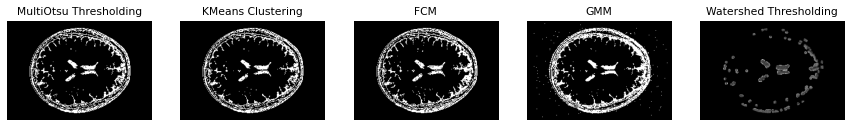

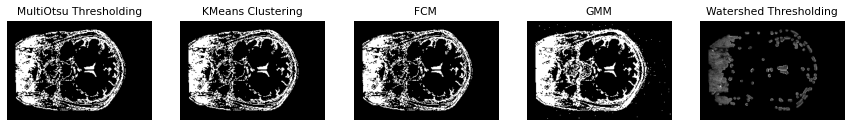

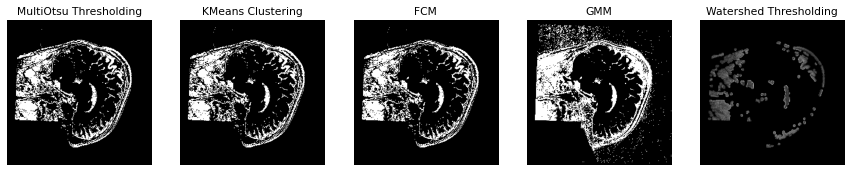

In [ ]:
label_m = ['MultiOtsu Thresholding','KMeans Clustering','FCM','GMM','Watershed Thresholding']
display_axial_csf = [255*(csf_axial_multiotsu_4),brain_axial_kmeans_csf,brain_axial_cmeans_csf,brain_axial_gmm_csf,brain_axial_watershed_csf]
display_coronal_csf = [255*(csf_coronal_multiotsu_4),brain_coronal_kmeans_csf,brain_coronal_cmeans_csf,brain_coronal_gmm_csf,brain_coronal_watershed_csf]
display_saggital_csf = [255*(csf_saggital_multiotsu_4),brain_saggital_kmeans_csf,brain_saggital_cmeans_csf,brain_saggital_gmm_csf,brain_saggital_watershed_csf]
fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))
for i in range(len(display_axial_csf)):
  ax[i].imshow(display_axial_csf[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))
for i in range(len(display_coronal_csf)):
  ax[i].imshow(display_coronal_csf[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=5,figsize =(15,15))

for i in range(len(display_saggital_csf)):
  ax[i].imshow(display_saggital_csf[i],cmap='gray')
  ax[i].set_title(label_m[i])
  ax[i].axis("off")

plt.show()

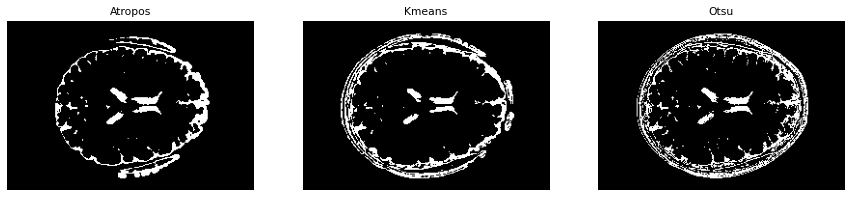

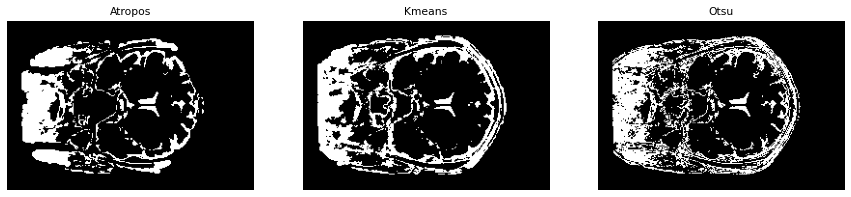

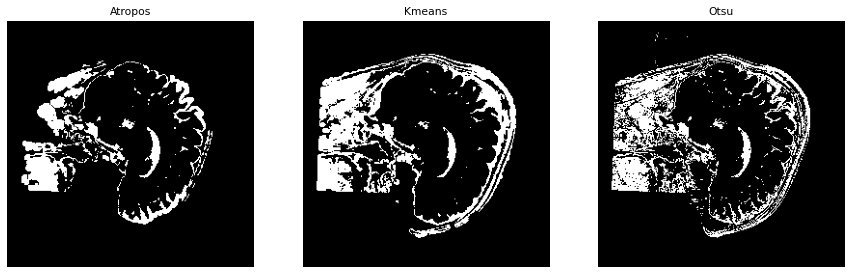

In [ ]:
references_axial_csf = [antspy_seg_atropos_data_axial_whole==antspy_labels_3[1],antspy_seg_kmeans_data_axial_whole==antspy_labels_3[1],antspy_seg_otsu_data_axial_whole==antspy_labels_3[1]]
references_coronal_csf = [antspy_seg_atropos_data_coronal_whole==antspy_labels_4[1],antspy_seg_kmeans_data_coronal_whole==antspy_labels_3[1],antspy_seg_otsu_data_coronal_whole==antspy_labels_3[1]]
references_saggital_csf = [antspy_seg_atropos_data_saggital_whole==antspy_labels_4[1],antspy_seg_kmeans_data_saggital_whole==antspy_labels_3[1],antspy_seg_otsu_data_saggital_whole==antspy_labels_3[1]]

label_ref = ['Atropos','Kmeans','Otsu']
fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_axial_csf)):
  ax[i].imshow(references_axial_csf[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_coronal_csf)):
  ax[i].imshow(references_coronal_csf[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")

plt.show()

fig,ax = plt.subplots(nrows=1,ncols=3,figsize =(15,15))
for i in range(len(references_saggital_csf)):
  ax[i].imshow(references_saggital_csf[i],cmap='gray')
  ax[i].set_title(label_ref[i])
  ax[i].axis("off")


In [ ]:
print("Dice coefficeint calculation for CSF segmentation along axial:")

axial = []
for i in range(len(display_axial_csf)):
  for j in range(len(references_axial_csf)):
    axial.append(dice(display_axial_csf[i],references_axial_csf[j]))
data = {"MULTI OTSU":axial[0:3],"K-MEANS":axial[3:6],"C-MEANS":axial[6:9],"GMM":axial[9:12],"ws":axial[12:15]}



df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)
##################################################

print("Dice coefficeint calculation for CSF segmentation along coronal:")

coronal = []
for i in range(len(display_coronal_csf)):
  for j in range(len(references_coronal_csf)):
    coronal.append(dice(display_coronal_csf[i],references_coronal_csf[j]))
data = {"MULTI OTSU":coronal[0:3],"K-MEANS":coronal[3:6],"C-MEANS":coronal[6:9],"GMM":coronal[9:12],"ws":coronal[12:15]}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

##################################################
print("Dice coefficeint calculation for CSF segmentation along saggital:")

saggital = []
for i in range(len(display_saggital_csf)):
  for j in range(len(references_saggital_csf)):
    saggital.append(dice(display_saggital_csf[i],references_saggital_csf[j]))
data = {"MULTI OTSU":saggital[0:3],"K-MEANS":saggital[3:6],"C-MEANS":saggital[6:9],"GMM":saggital[9:12],"ws":saggital[12:15]}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

Dice coefficeint calculation for CSF segmentation along axial:
                MULTI OTSU   K-MEANS   C-MEANS       GMM        ws
ANTSPY ATROPOS    0.652090  0.649613  0.647457  0.559490  0.554481
ANTSPY KMEANS     0.624101  0.637998  0.568260  0.758995  0.472465
ANTSPY OTSU       0.916024  0.933261  0.846423  0.874302  0.496472
Dice coefficeint calculation for CSF segmentation along coronal:
                MULTI OTSU   K-MEANS   C-MEANS       GMM        ws
ANTSPY ATROPOS    0.749485  0.749485  0.764266  0.677386  0.649615
ANTSPY KMEANS     0.774841  0.774841  0.745661  0.846308  0.637354
ANTSPY OTSU       0.982988  0.982988  0.971051  0.891450  0.664682
Dice coefficeint calculation for CSF segmentation along saggital:
                MULTI OTSU   K-MEANS   C-MEANS       GMM        ws
ANTSPY ATROPOS    0.701764  0.693166  0.693166  0.509972  0.636099
ANTSPY KMEANS     0.673568  0.707647  0.707647  0.806061  0.581965
ANTSPY OTSU       0.914076  0.952570  0.952570  0.780326  0.638402


In [ ]:
print("Jaccard Index calculation for CSF segmentation along axial:")

axial = []
for i in range(len(display_axial_csf)):
  for j in range(len(references_axial_csf)):
    axial.append(jc(display_axial_csf[i],references_axial_csf[j]))
data = {"MULTI OTSU":axial[0:3],"K-MEANS":axial[3:6],"C-MEANS":axial[6:9],"GMM":axial[9:12],"ws":axial[12:15]}



df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)
##################################################

print("Jaccard Index calculation for CSF segmentation along coronal:")

coronal = []
for i in range(len(display_coronal_csf)):
  for j in range(len(references_coronal_csf)):
    coronal.append(jc(display_coronal_csf[i],references_coronal_csf[j]))
data = {"MULTI OTSU":coronal[0:3],"K-MEANS":coronal[3:6],"C-MEANS":coronal[6:9],"GMM":coronal[9:12],"ws":coronal[12:15]}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)
##################################################

print("Jaccard Index calculation for CSF segmentation along saggital:")
saggital = []
for i in range(len(display_saggital_csf)):
  for j in range(len(references_saggital_csf)):
    saggital.append(jc(display_saggital_csf[i],references_saggital_csf[j]))
data = {"MULTI OTSU":saggital[0:3],"K-MEANS":saggital[3:6],"C-MEANS":saggital[6:9],"GMM":saggital[9:12],"ws":saggital[12:15]}

df = pd.DataFrame(data, index = ["ANTSPY ATROPOS", "ANTSPY KMEANS","ANTSPY OTSU"])
pd.set_option('display.max_columns', None)
print(df)

Jaccard Index calculation for CSF segmentation along axial:
                MULTI OTSU   K-MEANS   C-MEANS       GMM        ws
ANTSPY ATROPOS    0.483778  0.481057  0.478696  0.388397  0.383586
ANTSPY KMEANS     0.453595  0.468426  0.396902  0.611597  0.309299
ANTSPY OTSU       0.845059  0.874873  0.733737  0.776676  0.330205
Jaccard Index calculation for CSF segmentation along coronal:
                MULTI OTSU   K-MEANS   C-MEANS       GMM        ws
ANTSPY ATROPOS    0.599341  0.599341  0.618472  0.512157  0.481059
ANTSPY KMEANS     0.632441  0.632441  0.594465  0.733564  0.467732
ANTSPY OTSU       0.966545  0.966545  0.943732  0.804159  0.497771
Jaccard Index calculation for CSF segmentation along saggital:
                MULTI OTSU   K-MEANS   C-MEANS       GMM        ws
ANTSPY ATROPOS    0.540551  0.530417  0.530417  0.342257  0.466382
ANTSPY KMEANS     0.507804  0.547565  0.547565  0.675128  0.410403
ANTSPY OTSU       0.841750  0.909436  0.909436  0.639783  0.468862
